### Load Packages

In [3]:
#!pip install xlrd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Load Dataset

In [4]:
import pandas as pd
df  = pd.read_excel("../data/EARLY.xls")
#df = pd.read_excel("../data/DIABETIC.xls")
df.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,SEQN,RIAGENDR,RIDAGEYR,RACE,EARLY,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,COMB,EXPCAN,TOTAL_ACCULTURATION_SCORE_v2,POVERTIES,HTN
0,10004,1,46,1,1.0,3.0,0,2.0,1.0,2,1.0,NaN,NaN,2.0,0.0,0.0
1,10005,2,39,2,1.0,3.0,1,3.0,1.0,3,1.0,NaN,NaN,2.0,0.0,1.0
2,10007,2,63,3,1.0,3.0,0,2.0,1.0,2,1.0,NaN,NaN,2.0,1.0,1.0
3,10101,1,68,2,1.0,1.0,1,3.0,1.0,2,1.0,NaN,NaN,2.0,0.0,1.0
4,10104,2,51,1,1.0,3.0,0,1.0,1.0,3,1.0,NaN,NaN,2.0,0.0,1.0


In [5]:
len(df)

8317

In [6]:
df.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER',
       'EDUC', 'COVERED_INSURANCE', 'FAT', 'Abdobesity', 'COMB', 'EXPCAN',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN'],
      dtype='object')

In [7]:
df['COMB'].unique() # Physical activity

array([nan,  1.,  0.])

In [8]:
df['COVERED_INSURANCE'].unique()

array([ 1., nan,  0.])

In [9]:
df['EXPCAN'].unique() # Canabis

array([nan,  0.,  1.,  2.])

In [10]:
df['RIDAGEYR'].unique()

array([46, 39, 63, 68, 51, 70, 81, 54, 48, 41, 52, 74, 72, 62, 57, 80, 78,
       35, 75, 73, 50, 66, 60, 40, 53, 43, 71, 42, 61, 85, 77, 64, 55, 82,
       44, 69, 83, 84, 65, 33, 59, 58, 56, 49, 76, 38, 67, 45, 21, 36, 28,
       79, 37, 29, 30, 32, 31, 47, 26, 34, 20, 27, 24, 25, 23, 22],
      dtype=int64)

## Check the missing data

In [11]:
df.isnull().sum()

SEQN                               0
RIAGENDR                           0
RIDAGEYR                           0
RACE                               0
EARLY                              1
COUPLE                             5
SMOKER                             0
EDUC                               8
COVERED_INSURANCE               4564
FAT                                0
Abdobesity                       996
COMB                            4747
EXPCAN                          7031
TOTAL_ACCULTURATION_SCORE_v2       2
POVERTIES                        945
HTN                             1027
dtype: int64

In [12]:
len(df)

8317

# Handling missing data

Infilling missing data would distort the data. So we chose not to apply any infilling missing data technique. We instead consider three scenarios, in order to derive all possible information, namely:

1 - Dropping all columns with more than 30 percent missing data, and dropping the remaing rows with missing data;

2 - Keeping all the columns and dropping the rows with missing data;

3 - Only dropping the column with more than 75 percent of missing data, and dropping all the remaining rows with missing data.

Afterwards, we compare the results obtained with those approaches.

In [13]:
print('Proportion missing of COVERED_INSURANCE:',2422/len(df),'Proportion missing of COMB:', 13324/len(df),'Proportion missing of EXPCAN:', 13605/len(df))

Proportion missing of COVERED_INSURANCE: 0.291210773115306 Proportion missing of COMB: 1.602019959119875 Proportion missing of EXPCAN: 1.6358061801130215


In [14]:
# Dropping all columns with more than 15 percent missing data, and dropping the remaining rows with missing data
df2 = df.drop(['EXPCAN','COMB'], axis=1)
df2 = df2.dropna()
len(df2)

2846

In [15]:
df2.isnull().sum()

SEQN                            0
RIAGENDR                        0
RIDAGEYR                        0
RACE                            0
EARLY                           0
COUPLE                          0
SMOKER                          0
EDUC                            0
COVERED_INSURANCE               0
FAT                             0
Abdobesity                      0
TOTAL_ACCULTURATION_SCORE_v2    0
POVERTIES                       0
HTN                             0
dtype: int64

In [16]:
#Keeping all the columns and dropping the rows with missing data
df3 = df.dropna()
len(df3)

236

In [17]:
df3.isnull().sum()

SEQN                            0
RIAGENDR                        0
RIDAGEYR                        0
RACE                            0
EARLY                           0
COUPLE                          0
SMOKER                          0
EDUC                            0
COVERED_INSURANCE               0
FAT                             0
Abdobesity                      0
COMB                            0
EXPCAN                          0
TOTAL_ACCULTURATION_SCORE_v2    0
POVERTIES                       0
HTN                             0
dtype: int64

In [18]:
# Only dropping the column with more than 75 percent of missing data, and dropping all the remaining rows with missing data
df4 = df.drop(columns='EXPCAN',axis=1)
df4 = df4.dropna()
len(df4)

975

# EDA

In [19]:
df21 = df2.drop(columns=['SEQN'],axis=1)
df31 = df3.drop(columns=['SEQN'],axis=1)
df41 = df4.drop(columns=['SEQN'],axis=1)

In [20]:
df41.head()

,RIAGENDR,RIDAGEYR,RACE,EARLY,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,COMB,TOTAL_ACCULTURATION_SCORE_v2,POVERTIES,HTN
1260,1,61,1,0.0,3.0,0,3.0,1.0,2,1.0,1.0,1.0,0.0,0.0
1261,1,70,1,1.0,2.0,1,1.0,1.0,3,1.0,1.0,1.0,0.0,1.0
1262,1,70,1,0.0,2.0,0,3.0,1.0,2,1.0,1.0,1.0,0.0,1.0
1263,1,70,2,1.0,3.0,1,2.0,1.0,2,1.0,0.0,1.0,0.0,1.0
1267,2,68,3,0.0,3.0,0,1.0,1.0,2,1.0,1.0,1.0,0.0,1.0


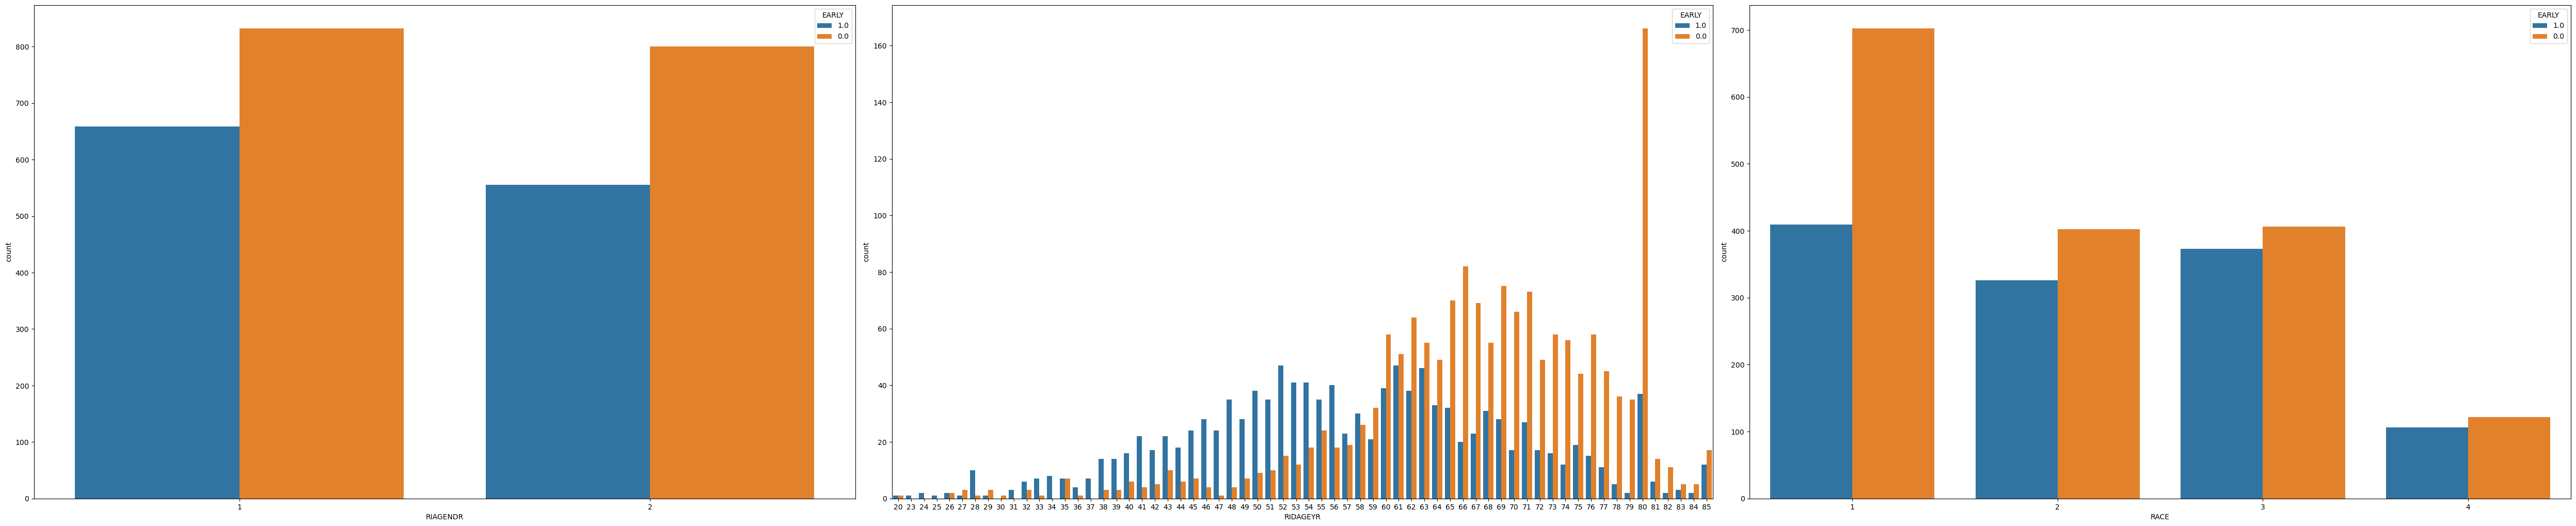

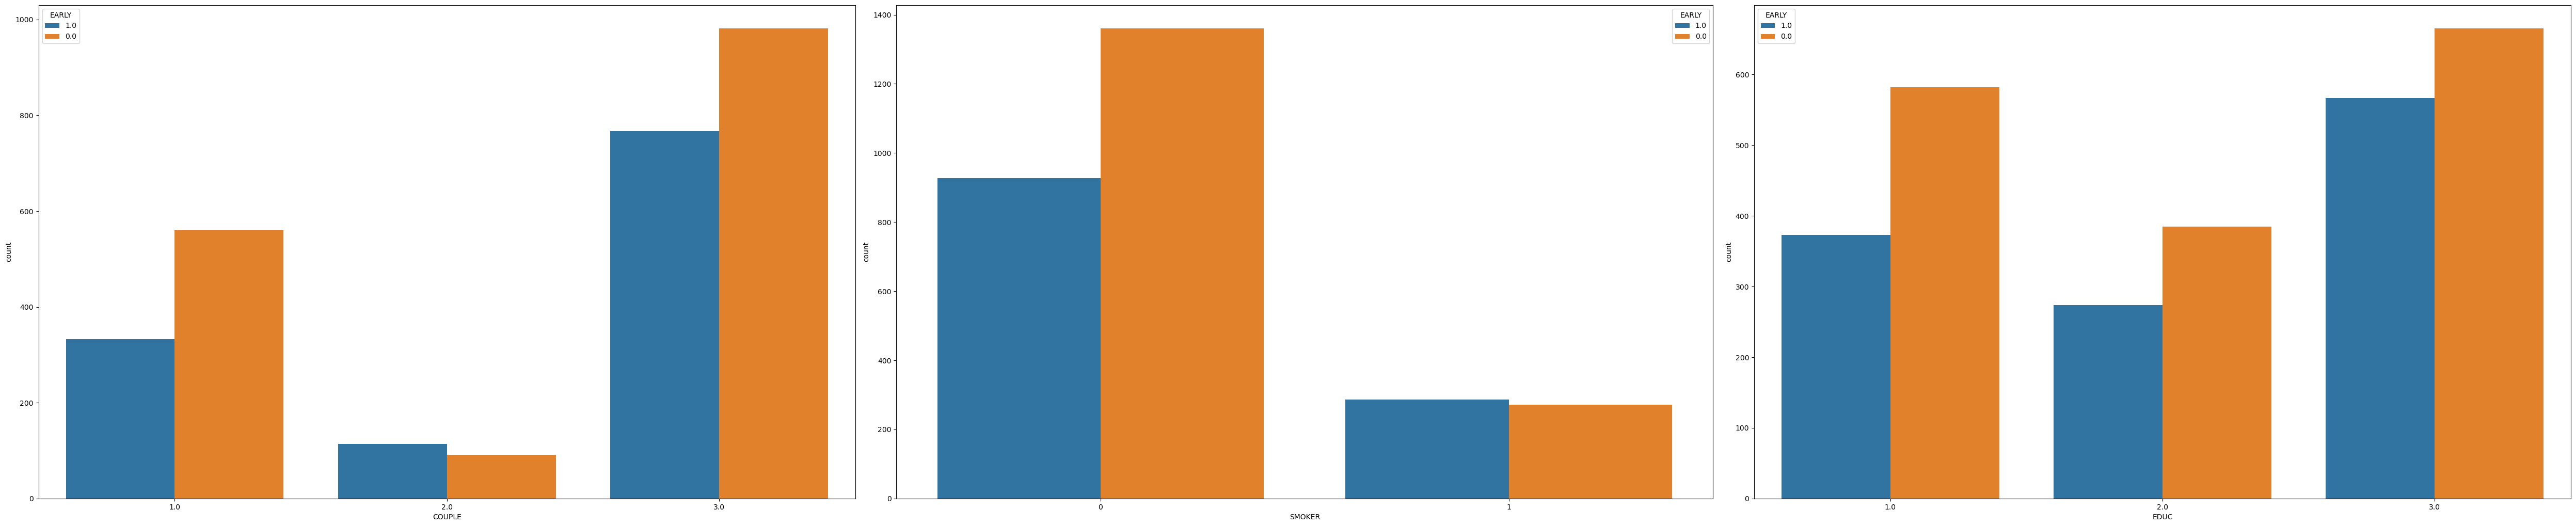

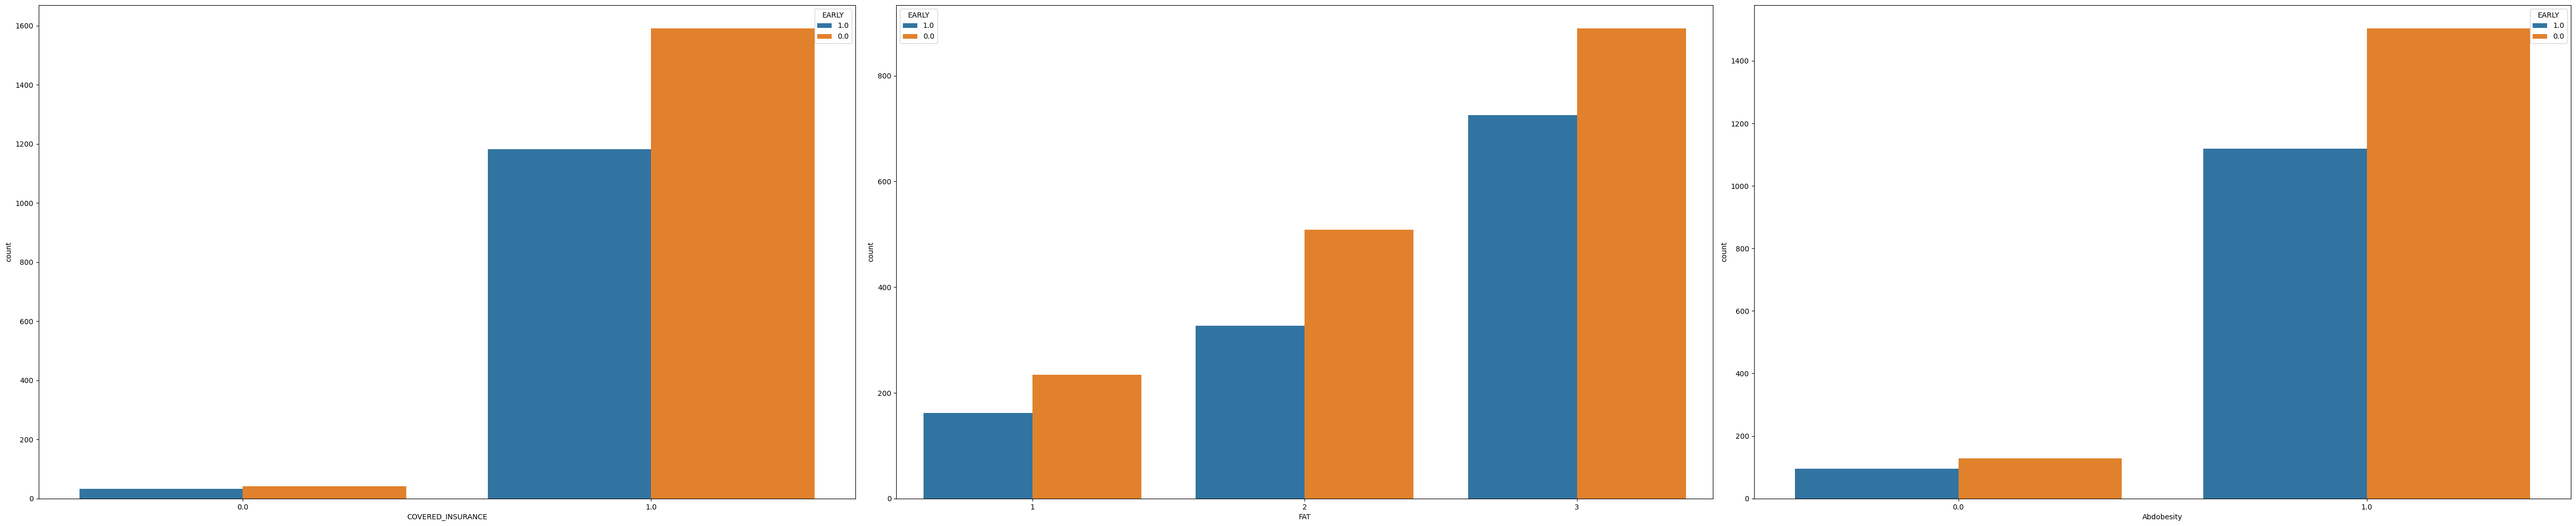

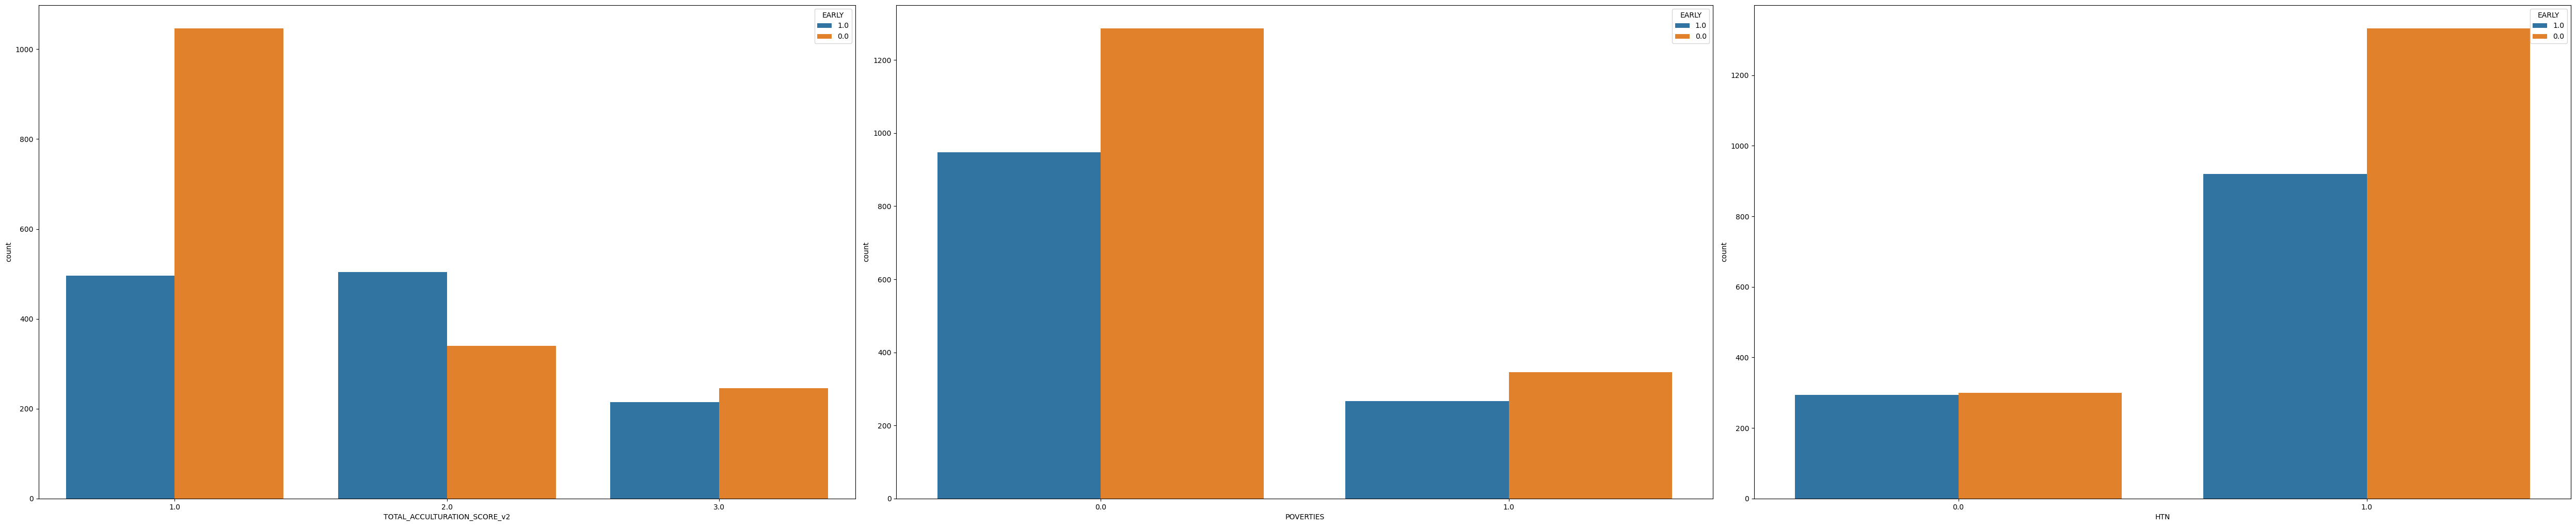

<Figure size 5000x2000 with 0 Axes>

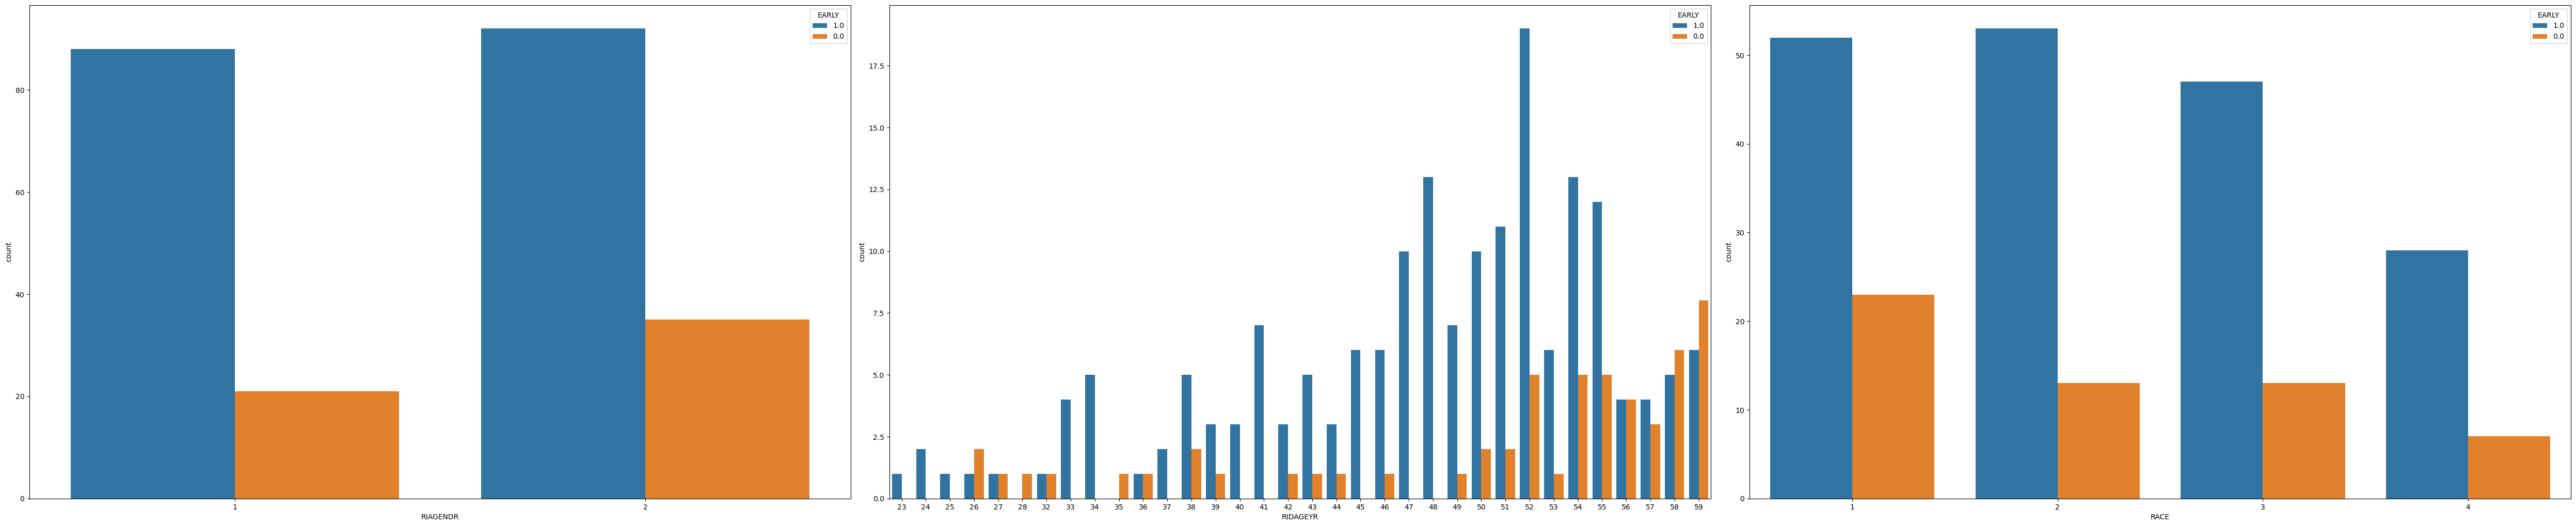

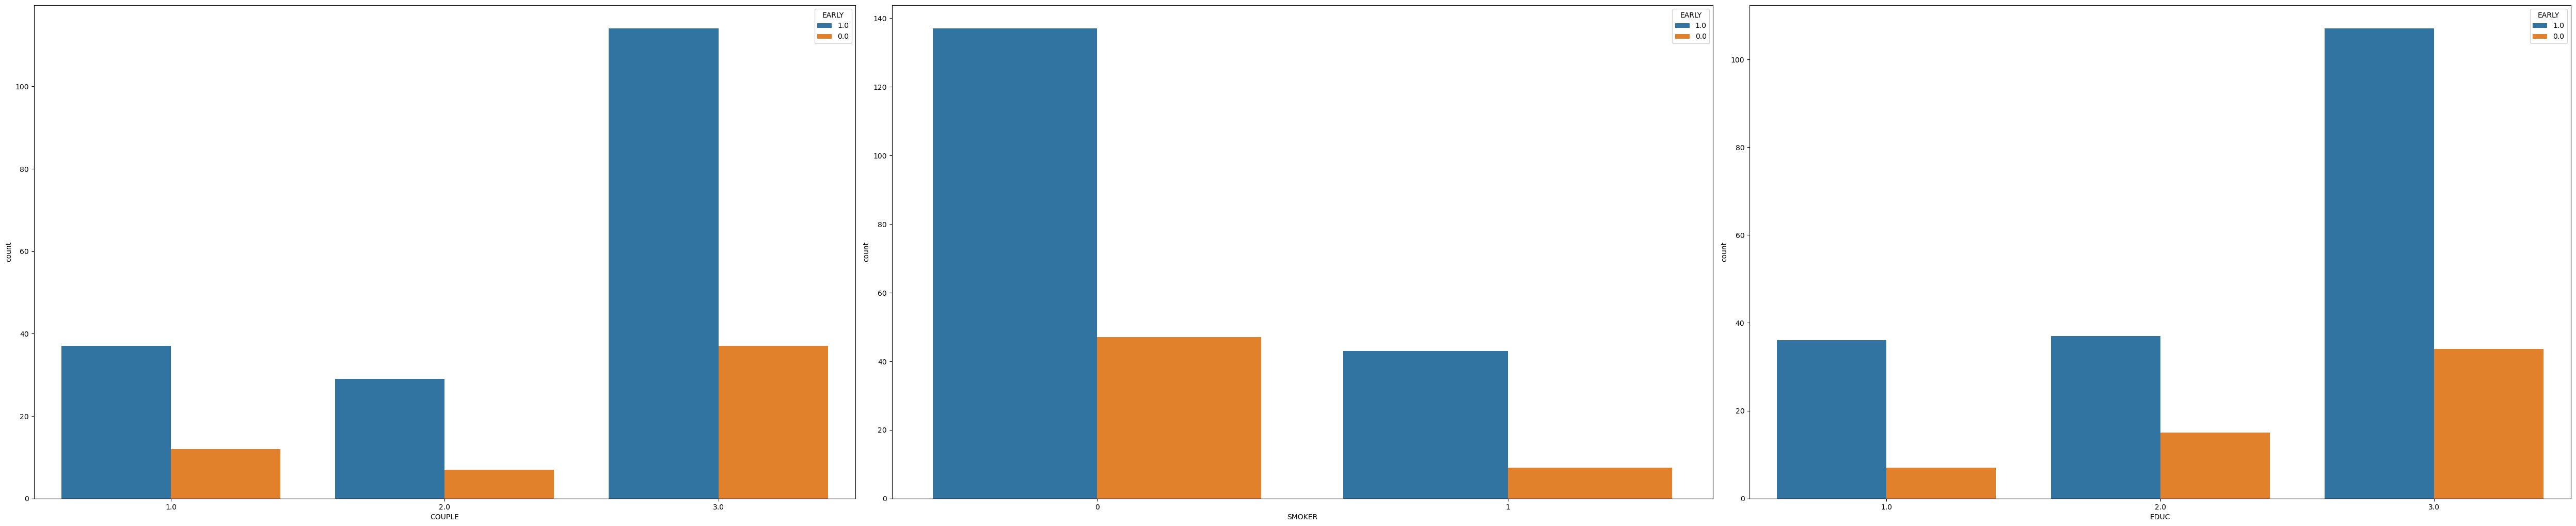

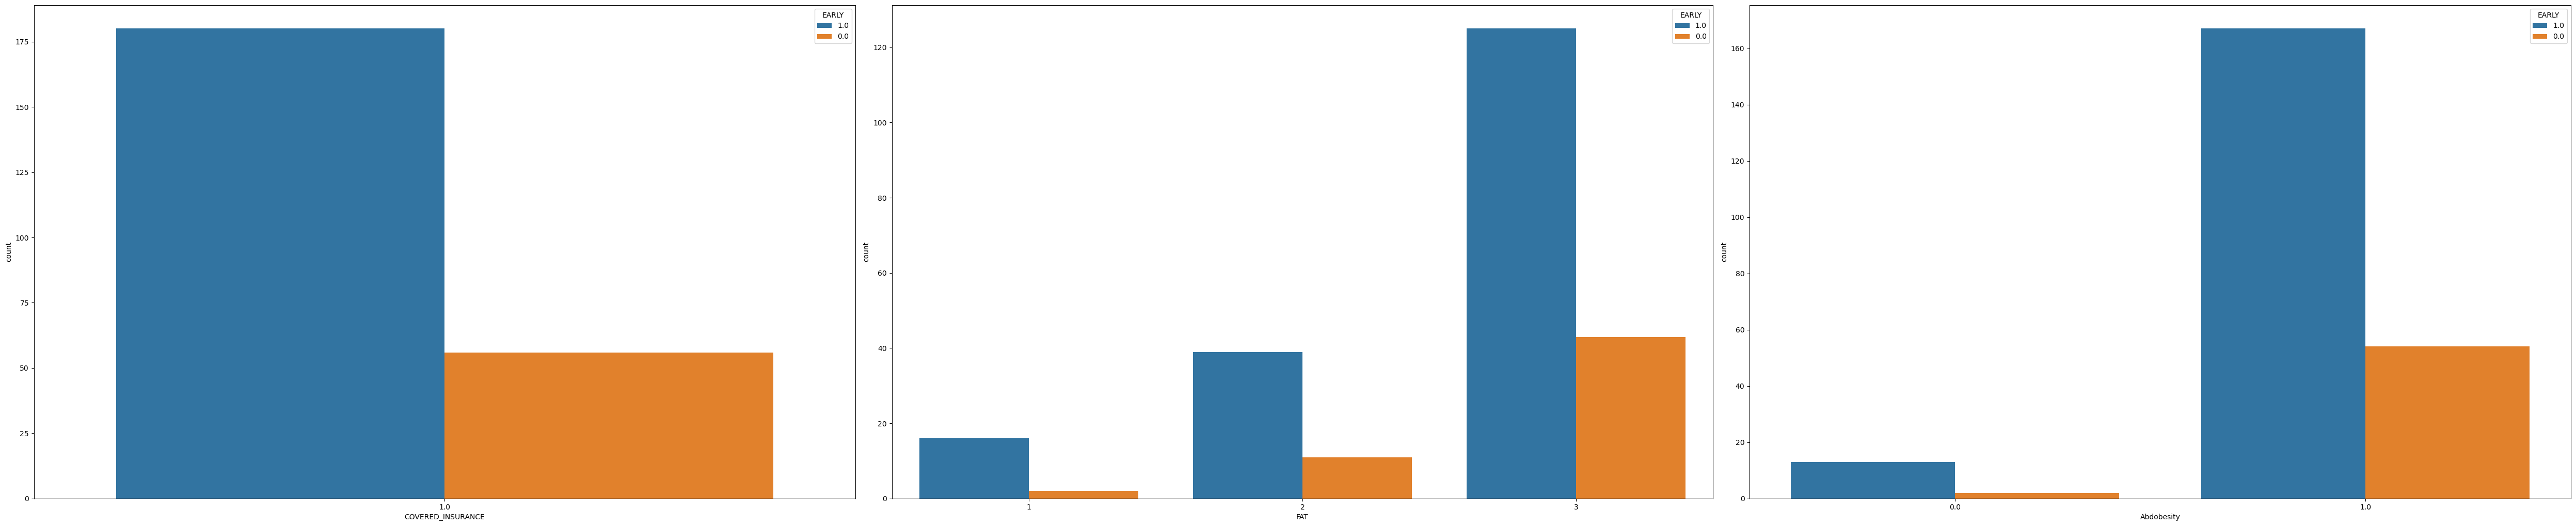

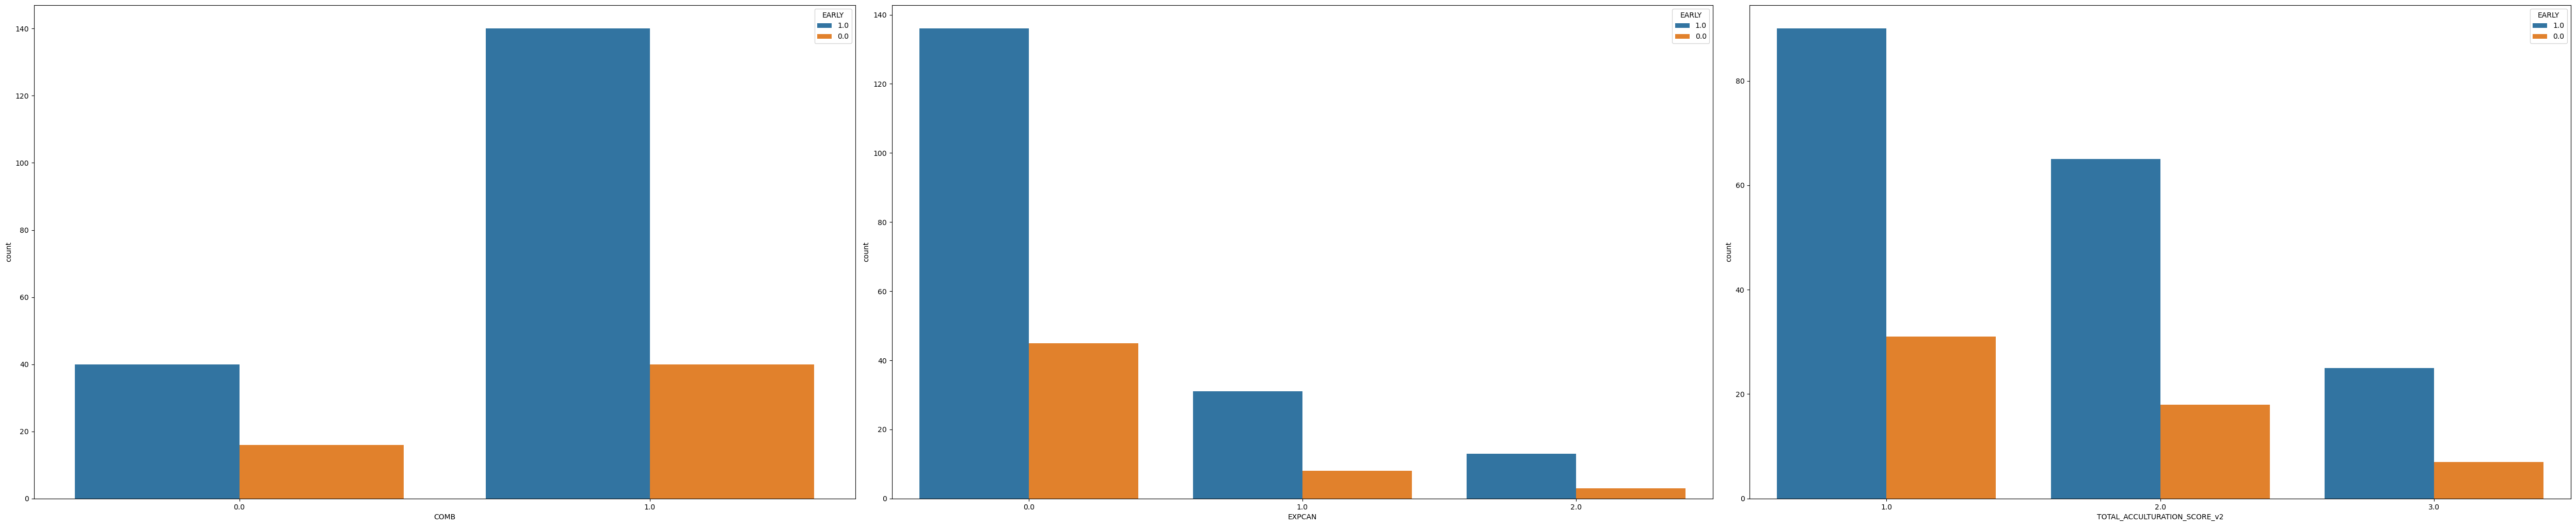

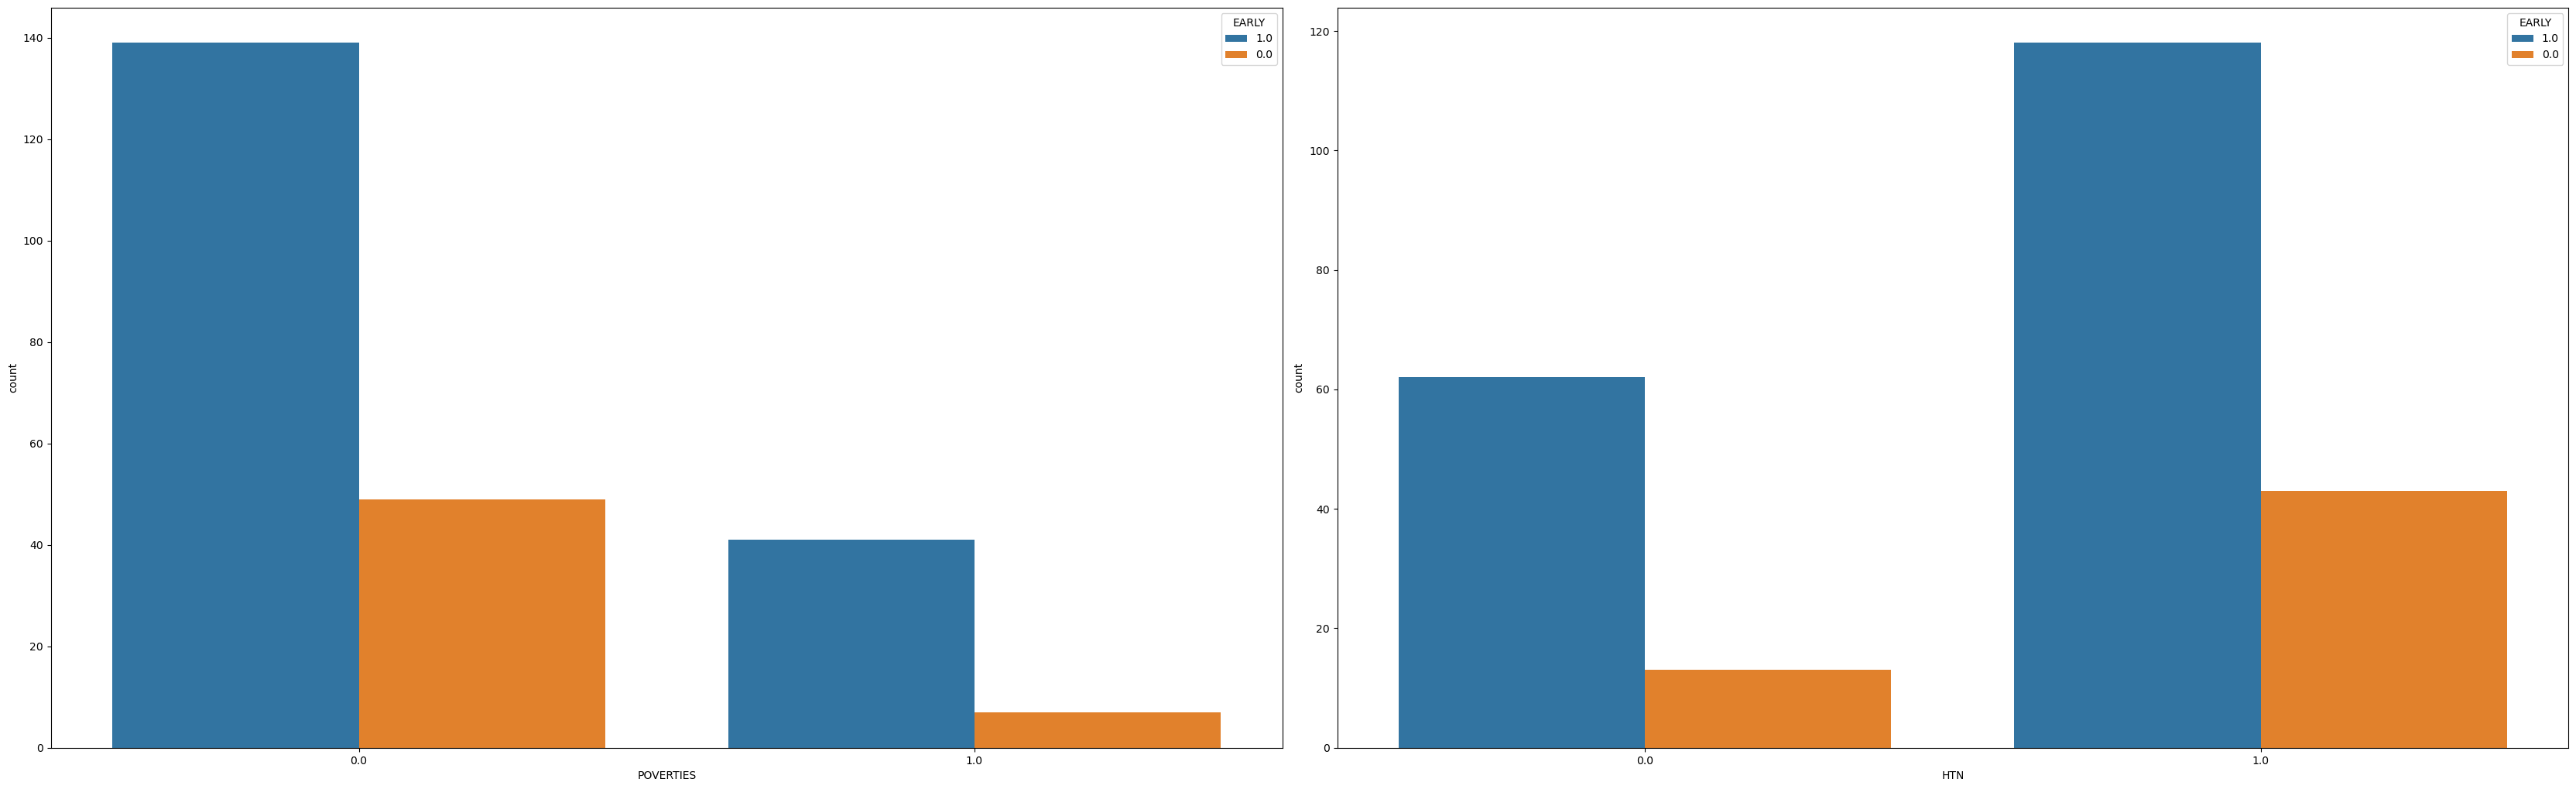

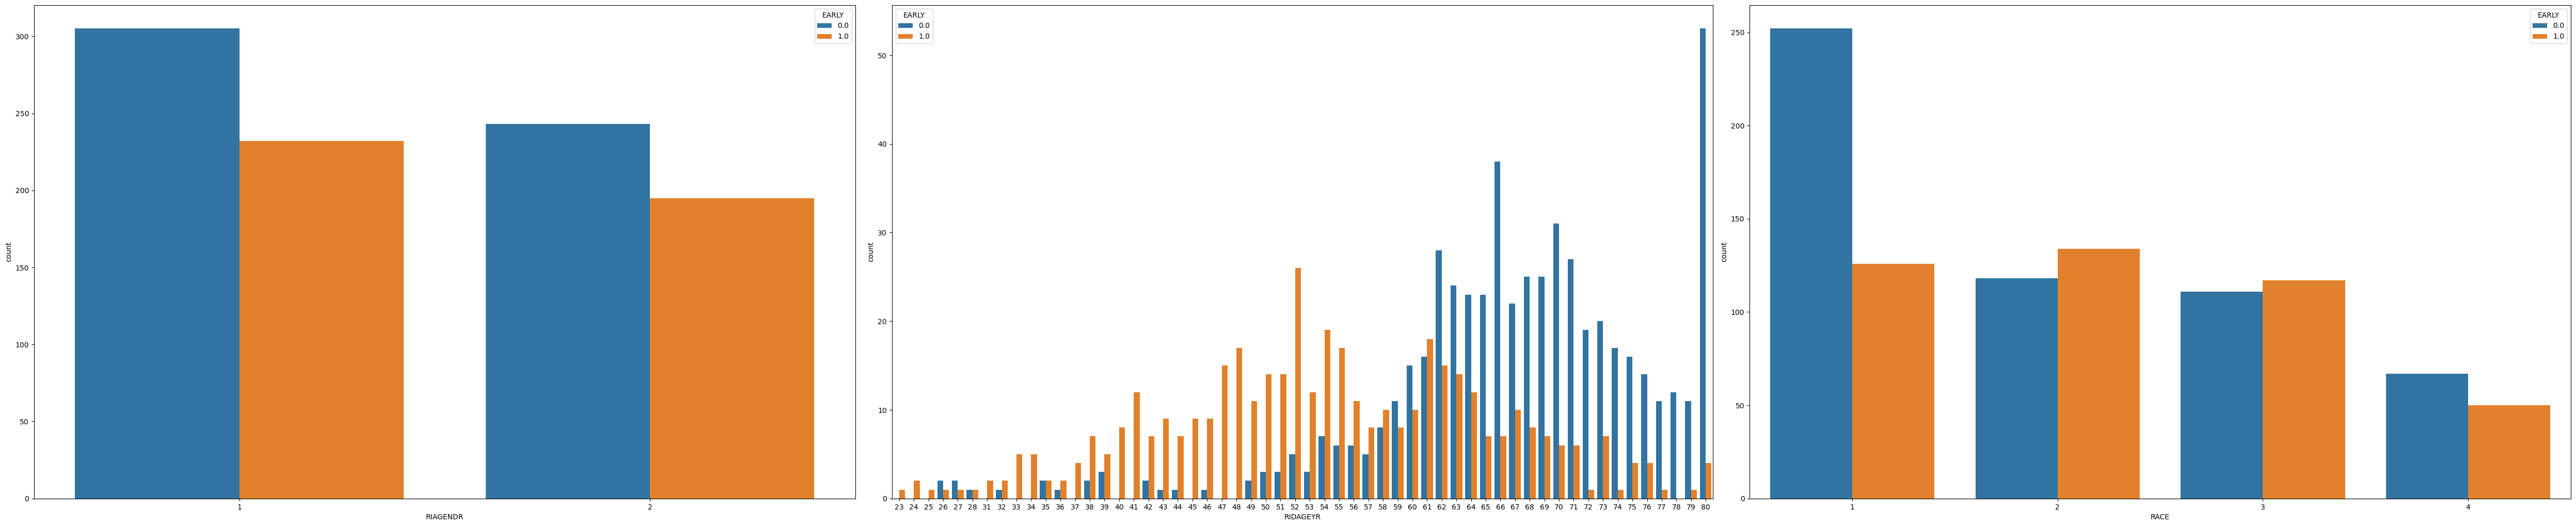

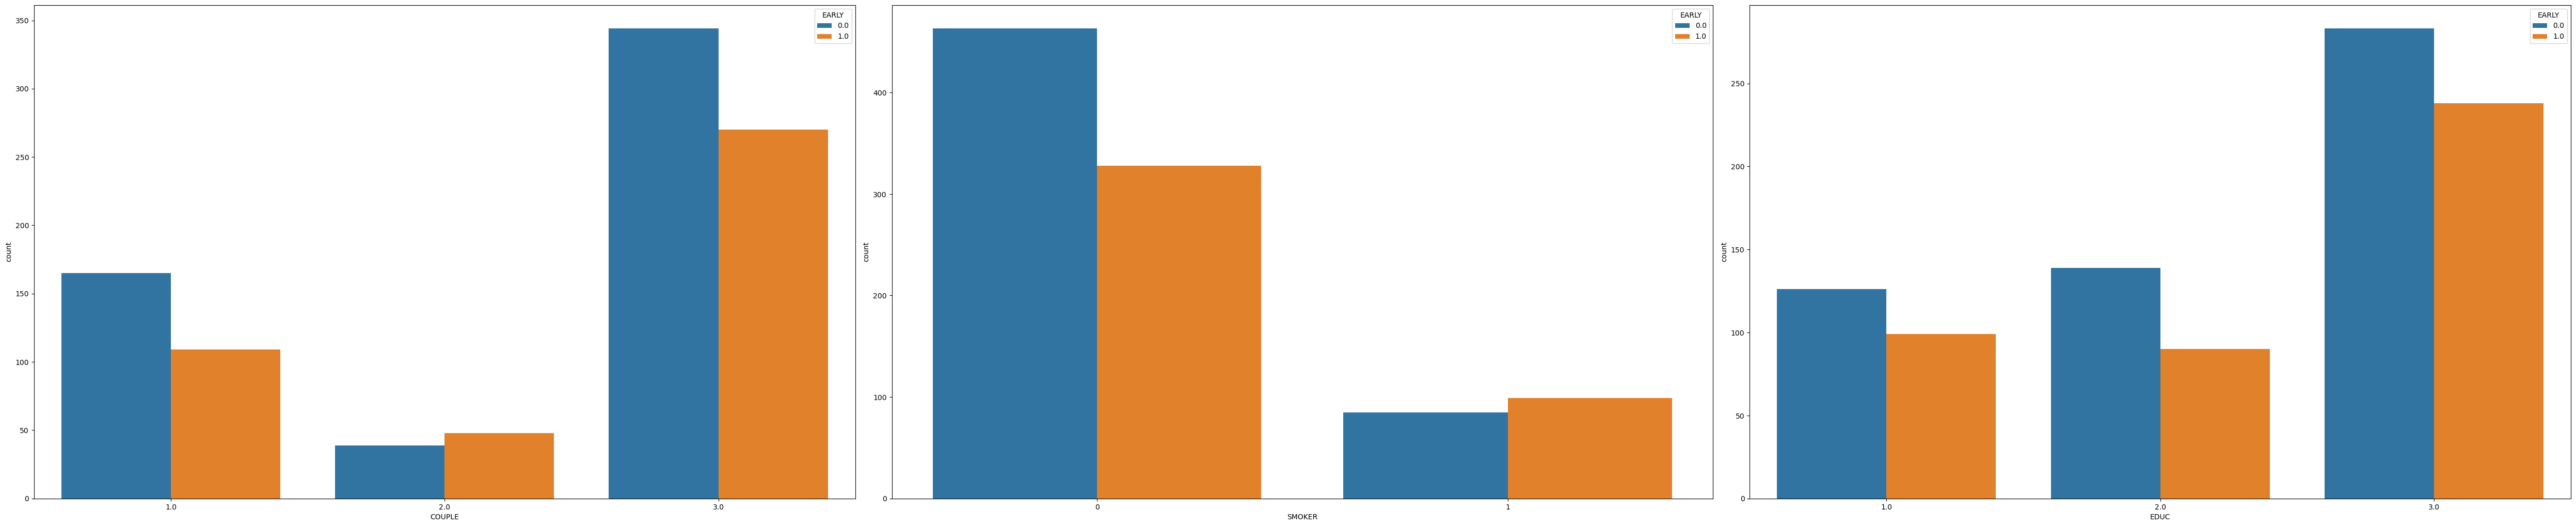

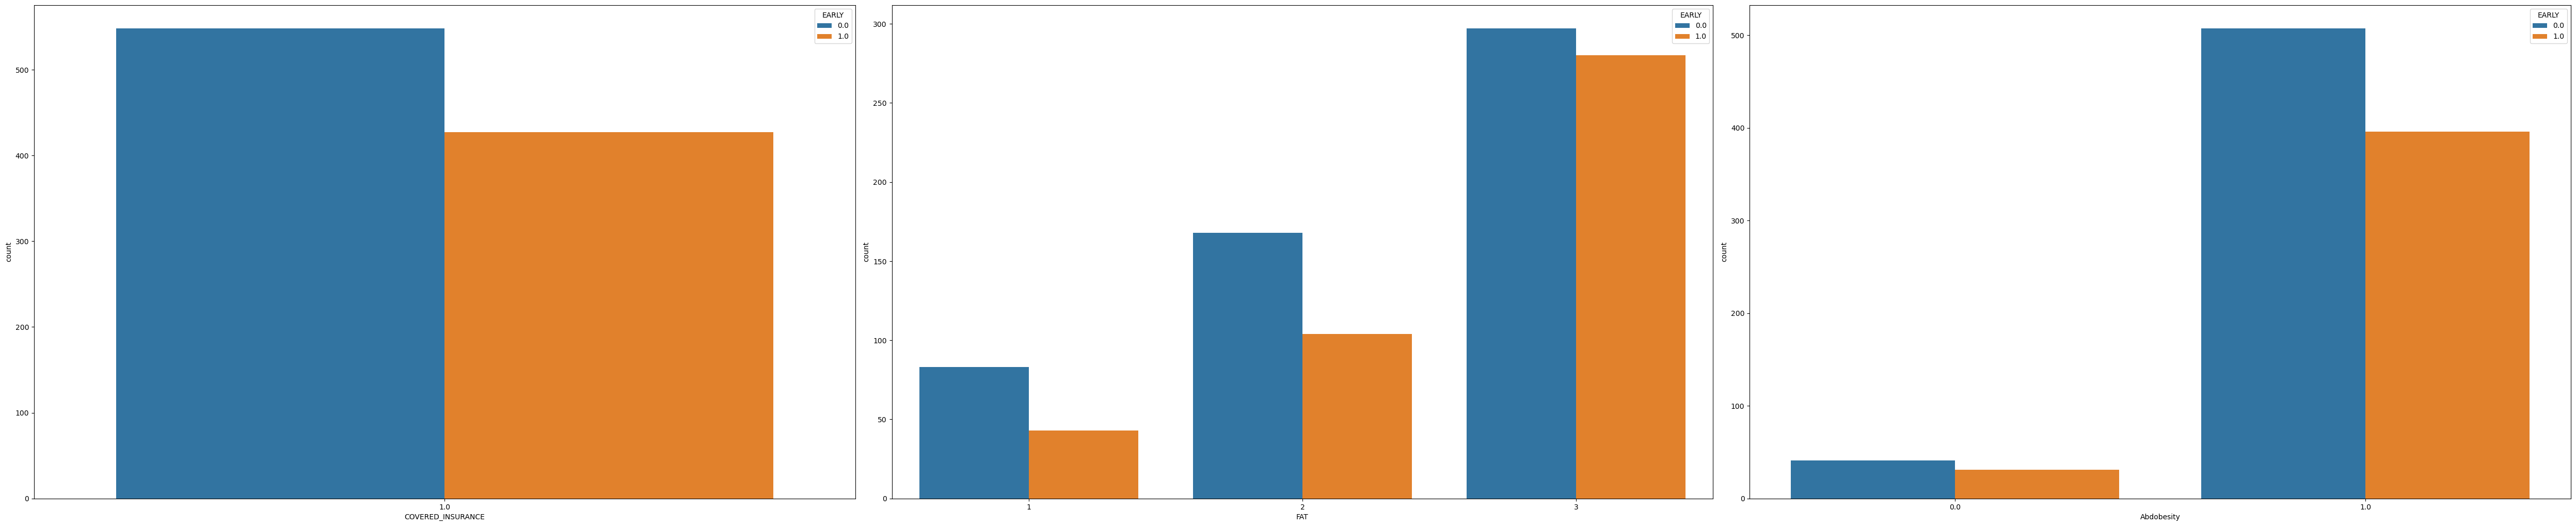

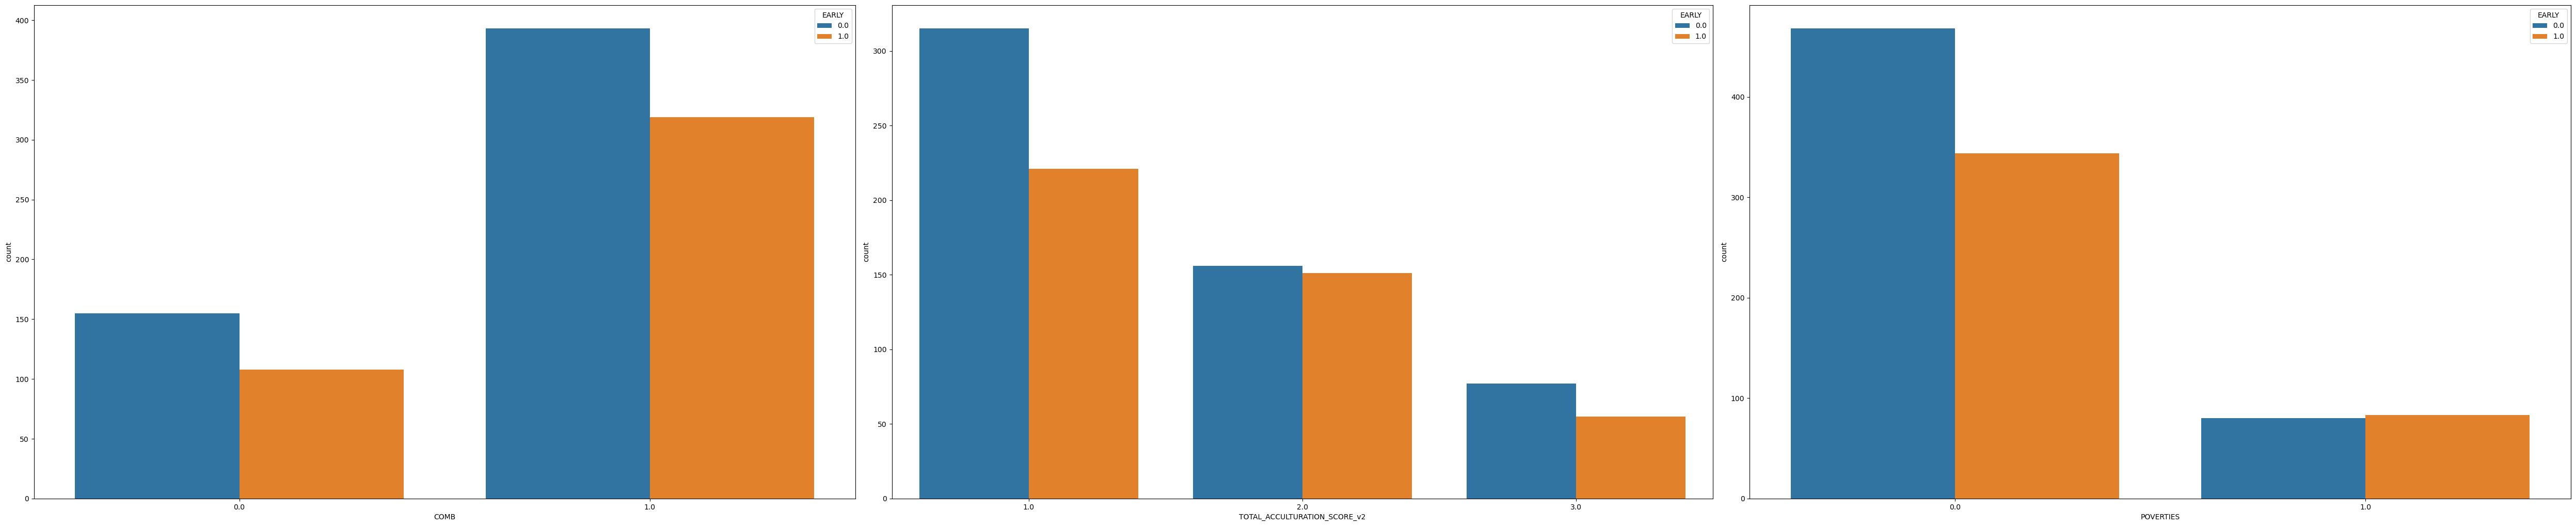

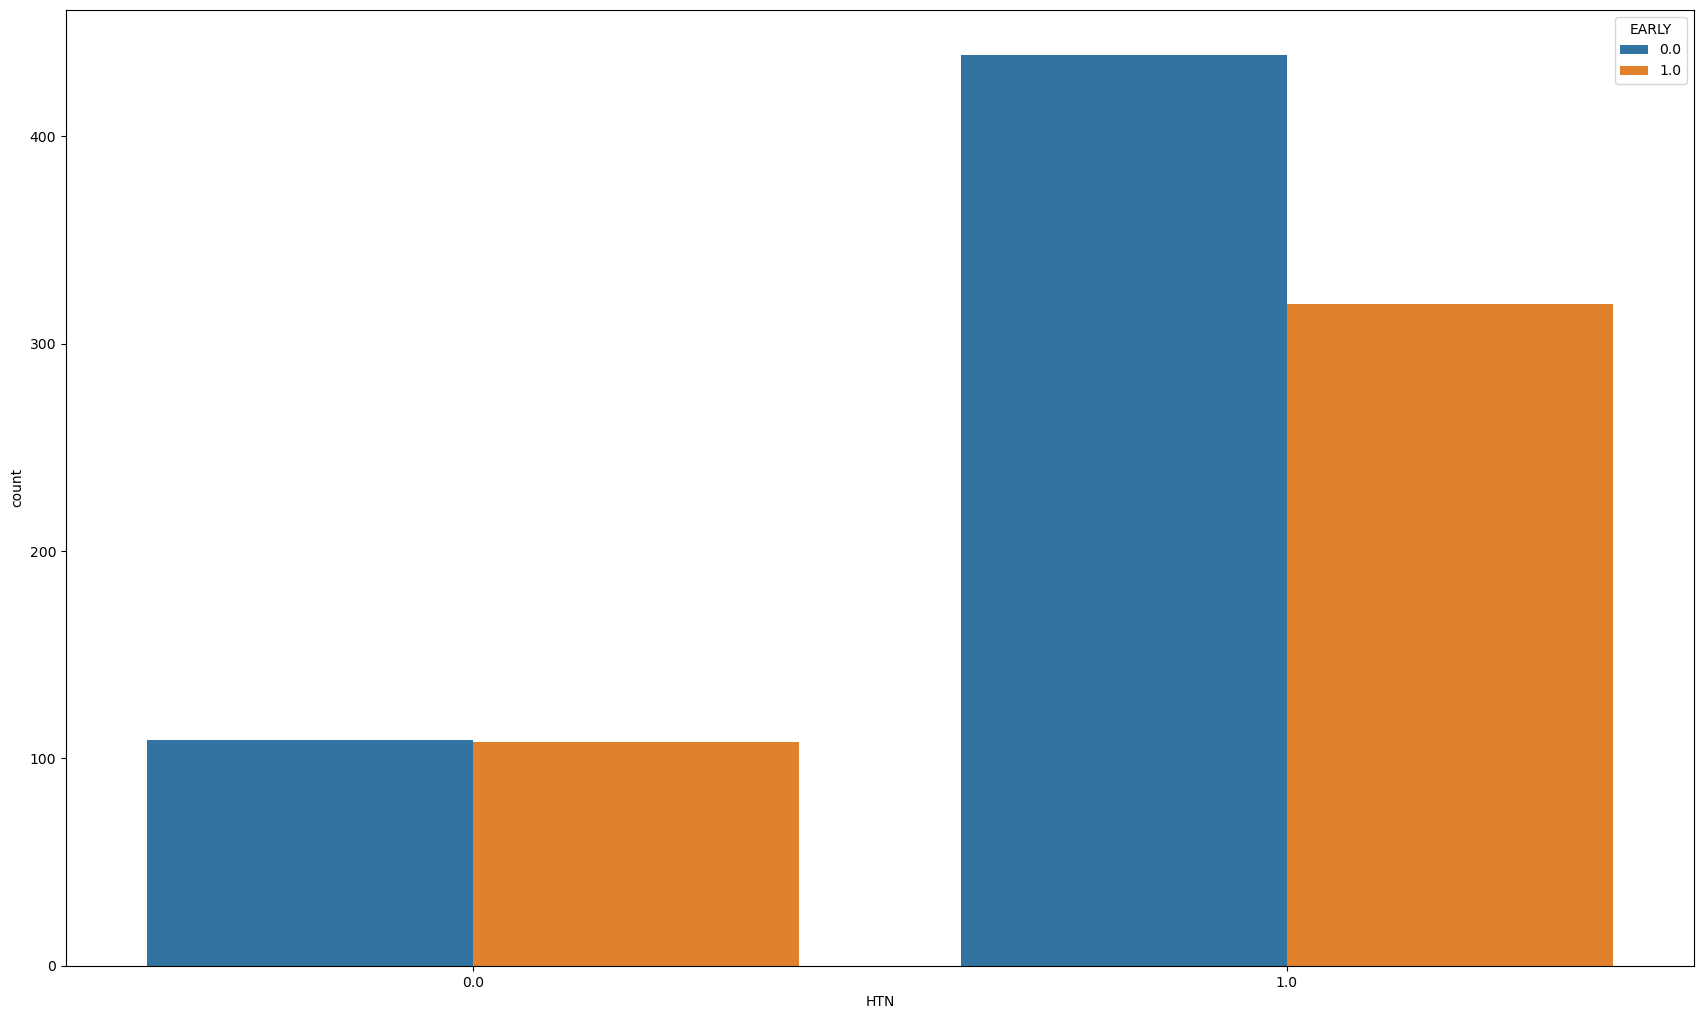

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of dataframes
E = [df21, df31, df41]

for e in E:
    # Ensure 'EARLY' column has no NaNs and is categorical
    if 'EARLY' in e.columns:
        e['EARLY'] = e['EARLY'].fillna('Unknown')  # Replace NaNs with 'Unknown'
        e['EARLY'] = e['EARLY'].astype(str)        # Convert to string for categorical handling

    ix = 1
    fig = plt.figure(figsize=(50, 20))

    # Loop through columns and plot
    for c in e.columns:
        if c != 'EARLY' and ix <= 3:
            ax1 = fig.add_subplot(2, 3, ix)
            sns.countplot(data=e, x=c, hue="EARLY", ax=ax1)
            ix += 1

        # Reset plot after 3 columns
        if ix > 3:
            plt.tight_layout()
            plt.show()  # Show the current figure
            fig = plt.figure(figsize=(50, 20))  # Start a new figure
            ix = 1  # Reset the index for the next figure

    # Show the remaining plots if any
    if ix > 1:
        plt.tight_layout()
        plt.show()

<Axes: xlabel='EARLY', ylabel='RIDAGEYR'>

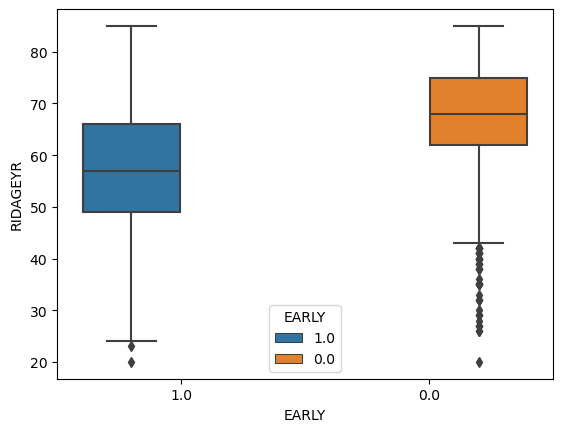

In [29]:
sns.boxplot(data=df21, x="EARLY", y="RIDAGEYR", hue="EARLY")

<Axes: xlabel='EARLY', ylabel='RIDAGEYR'>

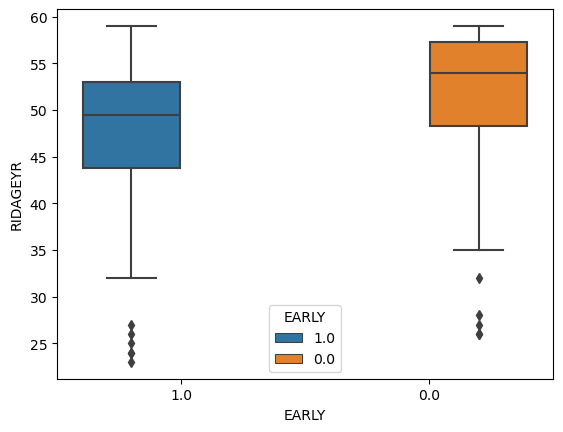

In [30]:
sns.boxplot(data=df31, x="EARLY", y="RIDAGEYR", hue="EARLY")

<Axes: xlabel='EARLY', ylabel='RIDAGEYR'>

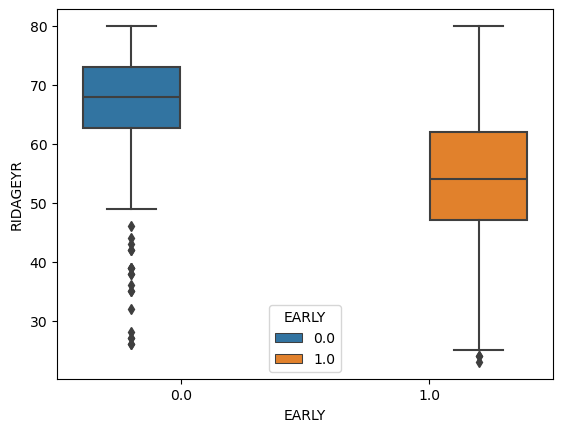

In [31]:
sns.boxplot(data=df41, x="EARLY", y="RIDAGEYR", hue="EARLY")

### Normalize numerical values

In [32]:
# Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df21))
df_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.400000,0.000000,1.0,1.0,0.0,0.5,1.0,0.5,1.0,0.5,0.0,0.0
1,1.0,0.292308,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0
2,1.0,0.661538,0.666667,1.0,1.0,0.0,0.5,1.0,0.5,1.0,0.5,1.0,1.0
3,0.0,0.738462,0.333333,1.0,0.0,1.0,1.0,1.0,0.5,1.0,0.5,0.0,1.0
4,1.0,0.476923,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.5,0.0,1.0


In [33]:
dff3 = pd.concat([df21.reset_index(),df_minmax[1]],axis=1)
dff3.head()

,index,RIAGENDR,RIDAGEYR,RACE,EARLY,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,TOTAL_ACCULTURATION_SCORE_v2,POVERTIES,HTN,1
0,0,1,46,1,1.0,3.0,0,2.0,1.0,2,1.0,2.0,0.0,0.0,0.400000
1,1,2,39,2,1.0,3.0,1,3.0,1.0,3,1.0,2.0,0.0,1.0,0.292308
2,2,2,63,3,1.0,3.0,0,2.0,1.0,2,1.0,2.0,1.0,1.0,0.661538
3,3,1,68,2,1.0,1.0,1,3.0,1.0,2,1.0,2.0,0.0,1.0,0.738462
4,4,2,51,1,1.0,3.0,0,1.0,1.0,3,1.0,2.0,0.0,1.0,0.476923


In [34]:
dff3 = dff3.drop(columns=['index','RIDAGEYR'],axis=1)
dff3.head()

,RIAGENDR,RACE,EARLY,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,TOTAL_ACCULTURATION_SCORE_v2,POVERTIES,HTN,1
0,1,1,1.0,3.0,0,2.0,1.0,2,1.0,2.0,0.0,0.0,0.400000
1,2,2,1.0,3.0,1,3.0,1.0,3,1.0,2.0,0.0,1.0,0.292308
2,2,3,1.0,3.0,0,2.0,1.0,2,1.0,2.0,1.0,1.0,0.661538
3,1,2,1.0,1.0,1,3.0,1.0,2,1.0,2.0,0.0,1.0,0.738462
4,2,1,1.0,3.0,0,1.0,1.0,3,1.0,2.0,0.0,1.0,0.476923


In [35]:
dff3 = dff3.rename(columns={1: "RIDAGEYR"})
dff3.head()

,RIAGENDR,RACE,EARLY,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,TOTAL_ACCULTURATION_SCORE_v2,POVERTIES,HTN,RIDAGEYR
0,1,1,1.0,3.0,0,2.0,1.0,2,1.0,2.0,0.0,0.0,0.400000
1,2,2,1.0,3.0,1,3.0,1.0,3,1.0,2.0,0.0,1.0,0.292308
2,2,3,1.0,3.0,0,2.0,1.0,2,1.0,2.0,1.0,1.0,0.661538
3,1,2,1.0,1.0,1,3.0,1.0,2,1.0,2.0,0.0,1.0,0.738462
4,2,1,1.0,3.0,0,1.0,1.0,3,1.0,2.0,0.0,1.0,0.476923


## Features importance

- Chi2
- Gini coefficient
- Mutual information.

The ranking is provided below:
Features
TOTAL_ACCULTURATION_SCORE_v2    28.586517
RIDAGEYR                        26.288796
SMOKER                          17.239100
RACE                            10.652850
EDUC                             3.939559
COUPLE                           2.997825
HTN                              2.995495
FAT                              1.116717
RIAGENDR                         0.514511
POVERTIES                        0.163220
Abdobesity                       0.000472
COVERED_INSURANCE                0.000278
dtype: float64
The graphical representation of the ranking is provided below:


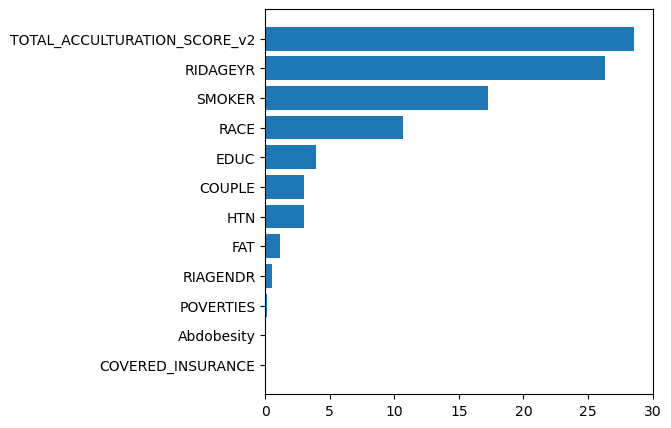

In [36]:
### Apply SelectKBest Algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

d = pd.DataFrame()
for i in range(100):
    X=dff3.drop(['EARLY'],axis=1)
    y=dff3['EARLY']

    ordered_rank_features=SelectKBest(score_func=chi2,k=9)
    ordered_feature=ordered_rank_features.fit(X,y)

    dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
    dfcolumns=pd.DataFrame(X.columns)

    features_rank=pd.concat([dfcolumns,dfscores],axis=1)

    features_rank.columns=['Features','Score']
    
    q = features_rank.rename(columns={'Score': 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]
d = pd.concat([dfcolumns,d],axis=1)
d = d.rename(columns={0: 'Features'})
d = d.set_index('Features')
print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

## Plot

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

d1 = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = d1.sort_values(by=0, ascending=True)
plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y)#,height = 0.9)
plt.show()

The ranking is provided below:
RIDAGEYR                        0.491901
TOTAL_ACCULTURATION_SCORE_v2    0.091206
RACE                            0.083006
EDUC                            0.065709
FAT                             0.063857
COUPLE                          0.054169
RIAGENDR                        0.037936
POVERTIES                       0.032876
HTN                             0.026096
SMOKER                          0.023583
Abdobesity                      0.016321
COVERED_INSURANCE               0.013341
dtype: float64
The graphical representation of the ranking is provided below:


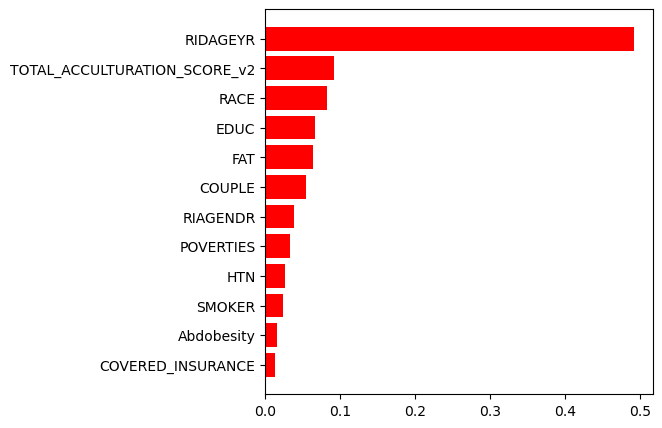

In [37]:
# ExtrExtraTreesClassifier
d = pd.DataFrame()
for i in range(100):
    #print('Simulation_'+str(i))
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt

    X=dff3.drop(['EARLY'],axis=1)
    y=dff3['EARLY']

    model=ExtraTreesClassifier()
    model.fit(X,y)

    features=pd.Series(model.feature_importances_,index=X.columns)
    #print(features.sort_values(ascending=False))
    
    q = pd.DataFrame(features).rename(columns={0: 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]
print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

# plot

# Plot or graphical representation

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

gini = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = gini.sort_values(by=0, ascending=True)

plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y,color=['red'])#,height = 0.9)

plt.show()

The ranking is provided below:
RIDAGEYR                        0.112118
TOTAL_ACCULTURATION_SCORE_v2    0.029288
COUPLE                          0.007425
RACE                            0.006228
SMOKER                          0.005515
FAT                             0.004778
EDUC                            0.004619
RIAGENDR                        0.004347
HTN                             0.004344
COVERED_INSURANCE               0.004014
POVERTIES                       0.003142
Abdobesity                      0.002654
dtype: float64
The graphical representation of the ranking is provided below:


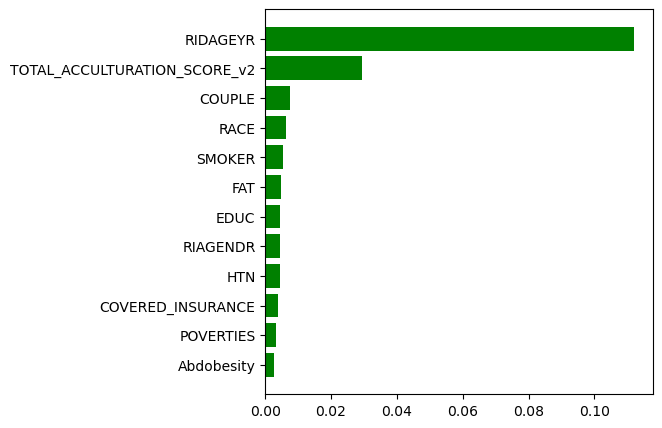

In [38]:
# Information Gain

d = pd.DataFrame()
for i in range(100):
    from sklearn.feature_selection import mutual_info_classif

    X=dff3.drop(['EARLY'],axis=1)
    y=dff3['EARLY']
    
    mutual_info=mutual_info_classif(X,y)

    mutual_data=pd.Series(mutual_info,index=X.columns)
    q = pd.DataFrame(mutual_data).rename(columns={0: 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]

print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

# Plot or graphical representation

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

MI = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = MI.sort_values(by=0, ascending=True)

plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y,color=['green'])#,height = 0.9)

plt.show()

## KNN with random sampler to address imbalanced data

In [81]:
## KNN

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define knn_models and parameters
    
    knn_model = KNeighborsClassifier()
    n_neighbors = range(1, 21, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']
    
    # define grid search
    
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    
    # Use the best parameters from gridSearchCV
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create KNN Object with the Best parameter from gridSearch with all features
    knn_model =  grid_result.best_estimator_ 
    
    #Train the model
    knn_model.fit(X,y)

    #Predict test data set
    y_pred = knn_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred))

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')
Resulting classification reports: 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       490
         1.0       0.56      0.56      0.56       364

    accuracy                           0.62       854
   macro avg       0.62      0.62      0.62       854
weighted avg       0.62      0.62      0.62       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE',

In [82]:
# Save the trained model for future use
import pickle 

# Its important to use binary mode 
knnPickle = open('KNN_RS_MI_EARLY', 'wb') 
      
# source, destination 
pickle.dump(knn_model, knnPickle)  

# close the file
knnPickle.close()
                
      
# load the model from disk
loaded_model = pickle.load(open('KNN_RS_MI_EARLY', 'rb'))
result = loaded_model.predict(testX) 

In [83]:
print(classification_report(testy,result))

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       490
         1.0       0.62      0.62      0.62       364

    accuracy                           0.67       854
   macro avg       0.67      0.67      0.67       854
weighted avg       0.67      0.67      0.67       854



## Naive Bayes

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: GaussianNB(var_smoothing=0.0001)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.71      0.74      0.73       490
       EARLY       0.63      0.60      0.61       364

    accuracy                           0.68       854
   macro avg       0.67      0.67      0.67       854
weighted avg       0.68      0.68      0.68       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN', 'EARLY'],
 

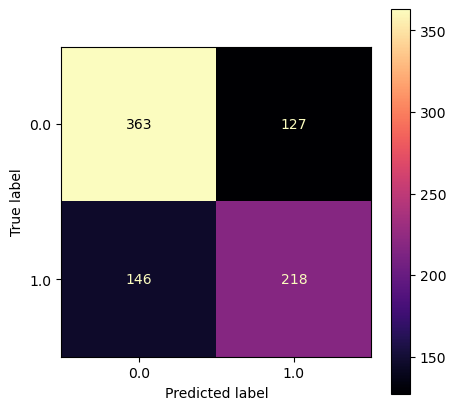

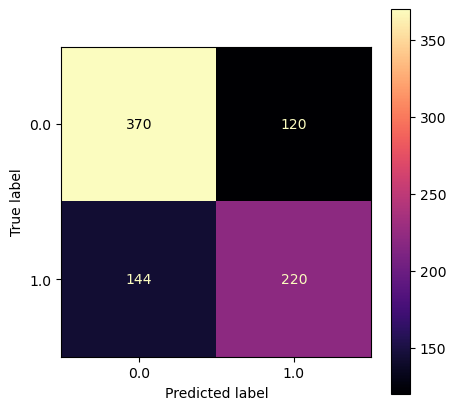

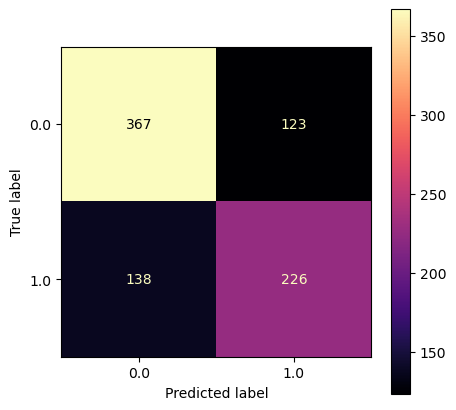

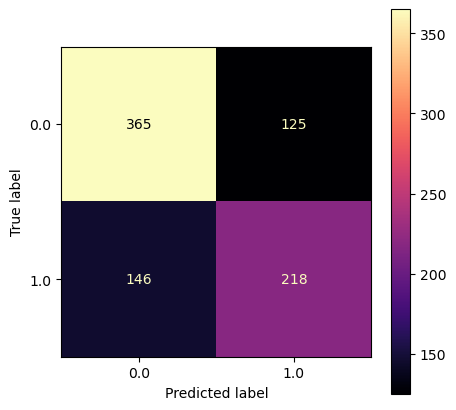

In [84]:
## nb

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define nb_models and parameters
    
    nb_model = GaussianNB() #'priors': [np.arange(0.2, 1.0, 0.1),np.arange(0.1, 1.0, 0.1)], priors=np.asarray([0.92,0.08])
    parameters = {
        'var_smoothing': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15,1e-2]
    }
    
    # define grid search
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(nb_model, parameters, cv=10)
    grid_result = grid_search.fit(X, y)
    
    # Use the best parameters from gridSearchCV
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create nb Object with the Best parameter from gridSearch with all features
    nb_model =  grid_result.best_estimator_ 
    
    #Train the model
    nb_model.fit(X,y)

    #Predict test data set
    y_pred = nb_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=nb_model.classes_,cmap='magma'))

## Logistic Regression

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: LogisticRegression(C=10, solver='newton-cg')
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.75      0.73      0.74       490
       EARLY       0.65      0.67      0.66       364

    accuracy                           0.71       854
   macro avg       0.70      0.70      0.70       854
weighted avg       0.71      0.71      0.71       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN',

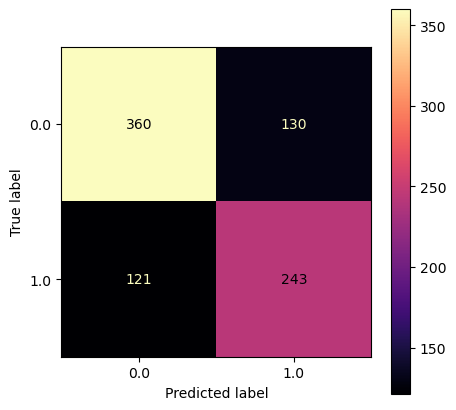

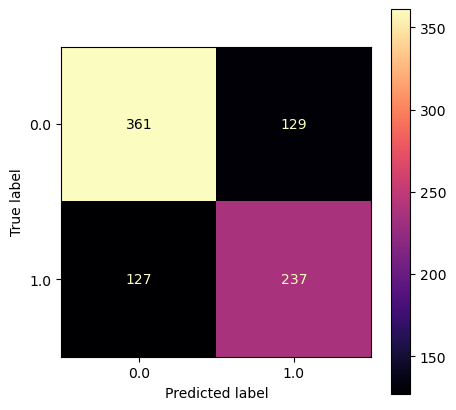

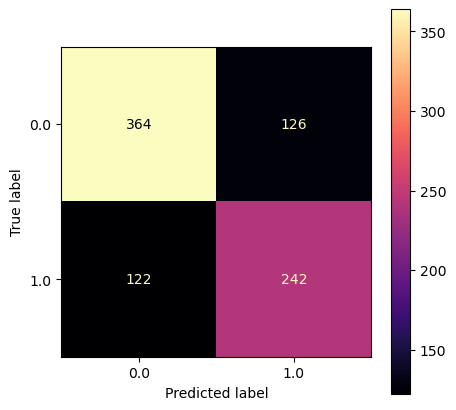

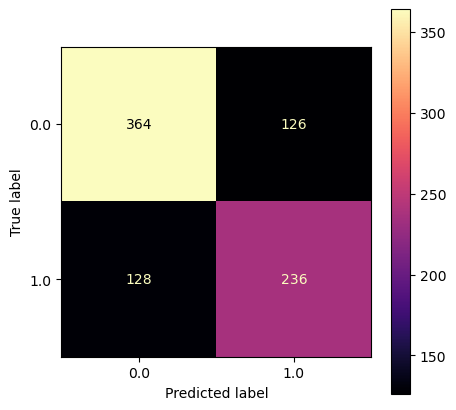

In [85]:
## LR

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define lg_models and parameters
    
    lg_model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
            
    # define grid search
    
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=lg_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)

    
    # Use the best parameters from gridSearchCV
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create lg Object with the Best parameter from gridSearch with all features
    lg_model =  grid_result.best_estimator_ 
    
    #Train the model
    lg_model.fit(X,y)

    #Predict test data set
    y_pred = lg_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=lg_model.classes_,cmap='magma'))

## Support vector classifier

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: SVC(C=50)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.74      0.75      0.74       490
       EARLY       0.66      0.63      0.65       364

    accuracy                           0.70       854
   macro avg       0.70      0.69      0.69       854
weighted avg       0.70      0.70      0.70       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN', 'EARLY'],
      dtype='object')
Be

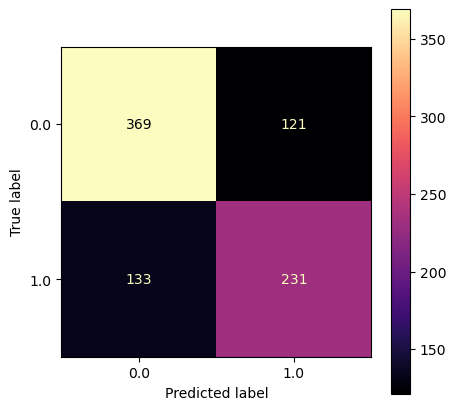

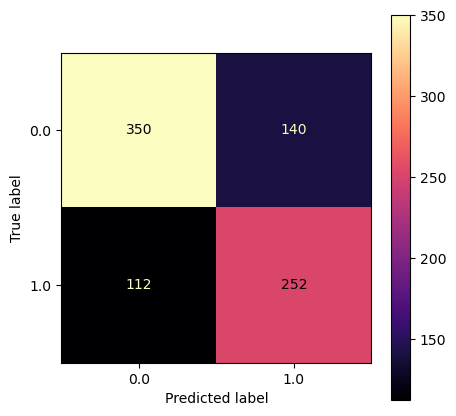

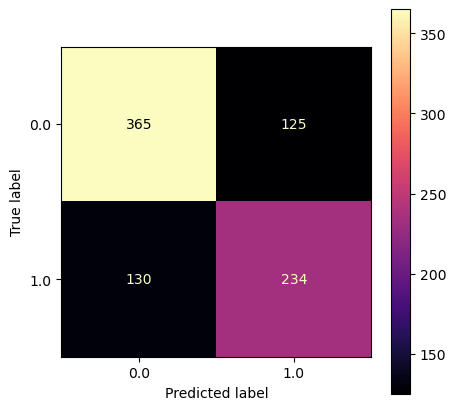

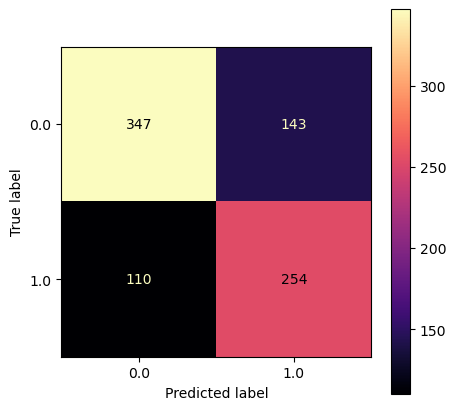

In [86]:
## svm

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define svm_models and parameters
    
    svm_model = SVC()
    kernel = ['rbf','poly', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
            
    # define grid search
    
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    grid_search = GridSearchCV(estimator=svm_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)

    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    svm_model =  grid_result.best_estimator_ 
    
    #Train the model
    svm_model.fit(X,y)

    #Predict test data set
    y_pred = svm_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=svm_model.classes_,cmap='magma'))

## RidgeClassifier

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: RidgeClassifier(alpha=0.5)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.74      0.74      0.74       490
       EARLY       0.65      0.64      0.65       364

    accuracy                           0.70       854
   macro avg       0.69      0.69      0.69       854
weighted avg       0.70      0.70      0.70       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN', 'EARLY'],
      d

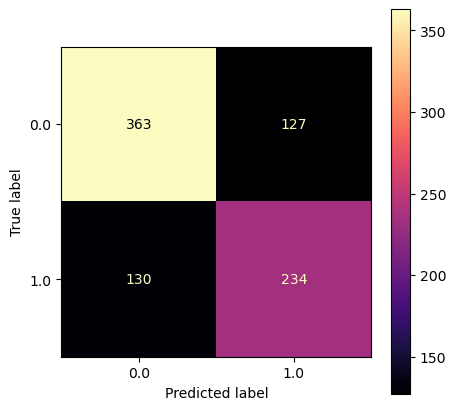

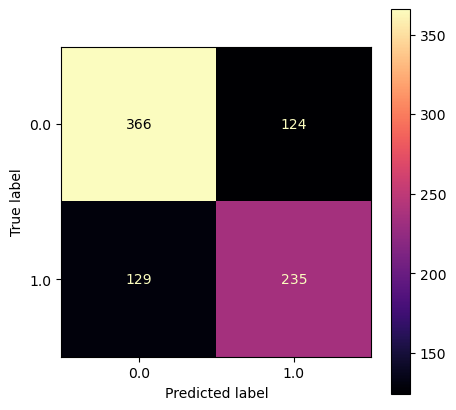

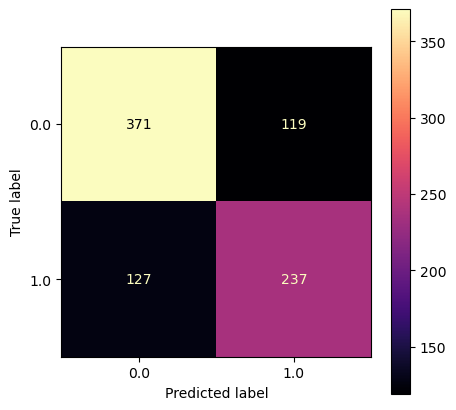

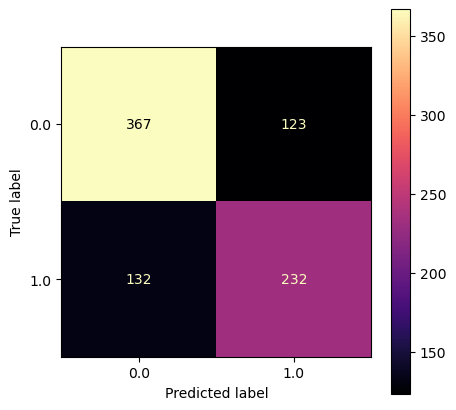

In [87]:
## ridge

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define r_models and parameters
    
    r_model = RidgeClassifier()
    alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
            
    # define grid search
    
    grid = dict(alpha=alpha)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=r_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)

    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    r_model =  grid_result.best_estimator_ 
    
    #Train the model
    r_model.fit(X,y)

    #Predict test data set
    y_pred = r_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=r_model.classes_,cmap='magma'))

## Bagging decision trees

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: BaggingClassifier(n_estimators=1000)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.74      0.76      0.75       490
       EARLY       0.67      0.65      0.66       364

    accuracy                           0.71       854
   macro avg       0.71      0.70      0.70       854
weighted avg       0.71      0.71      0.71       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN', 'EARLY'

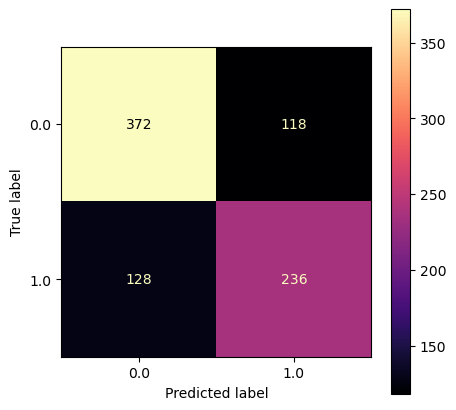

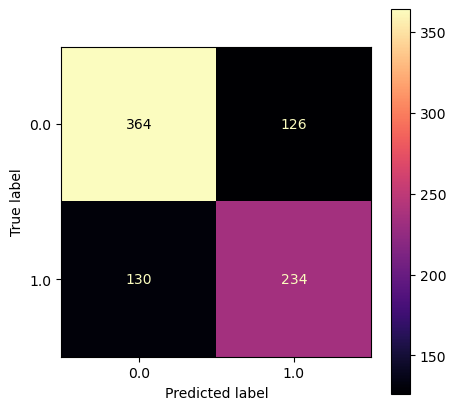

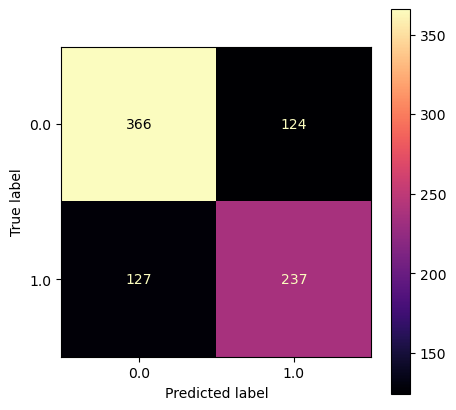

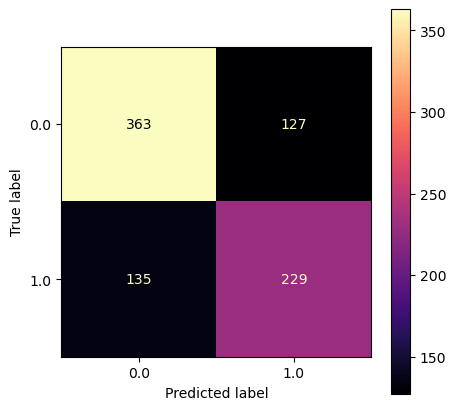

In [88]:
## Bagging

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define BC_models and parameters
    
    BC_model = BaggingClassifier()
    n_estimators = [10, 100, 1000]
            
    # define grid search
    
    grid = dict(n_estimators=n_estimators)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=BC_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)

    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    BC_model =  grid_result.best_estimator_ 
    
    #Train the model
    BC_model.fit(X,y)

    #Predict test data set
    y_pred = BC_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=BC_model.classes_,cmap='magma'))

## Random Forest

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: RandomForestClassifier(max_features='log2')
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.73      0.75      0.74       490
       EARLY       0.65      0.63      0.64       364

    accuracy                           0.70       854
   macro avg       0.69      0.69      0.69       854
weighted avg       0.70      0.70      0.70       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN', 

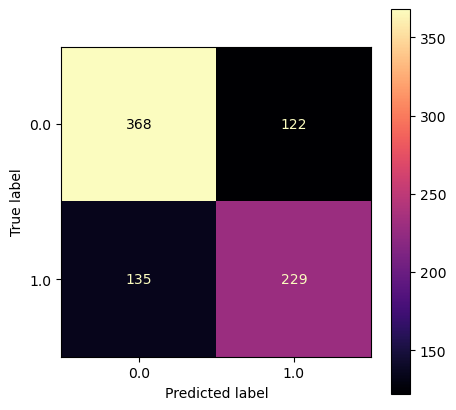

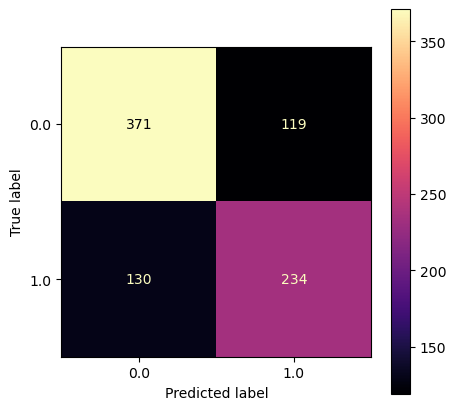

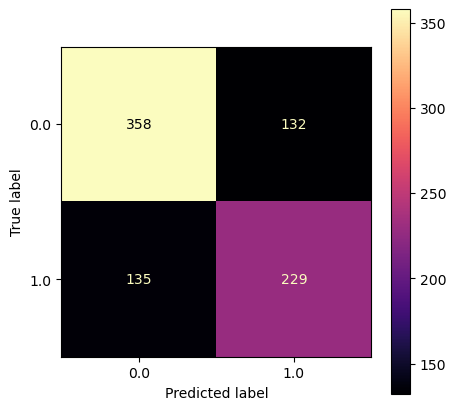

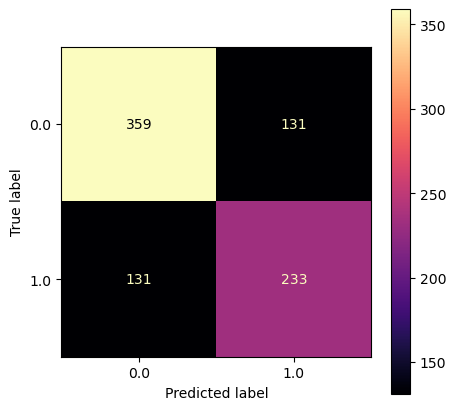

In [89]:
## RF

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define BC_models and parameters
    
    RF_model = RandomForestClassifier()
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
            
    # define grid search
    
    grid = dict(n_estimators=n_estimators,max_features=max_features)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=RF_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)

    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    RF_model =  grid_result.best_estimator_ 
    
    #Train the model
    RF_model.fit(X,y)

    #Predict test data set
    y_pred = RF_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=RF_model.classes_,cmap='magma'))

## GradientBoostingClassifier

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: GradientBoostingClassifier(max_depth=9, subsample=0.5)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.73      0.77      0.75       490
       EARLY       0.66      0.63      0.64       364

    accuracy                           0.71       854
   macro avg       0.70      0.70      0.70       854
weighted avg       0.70      0.71      0.70       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPL

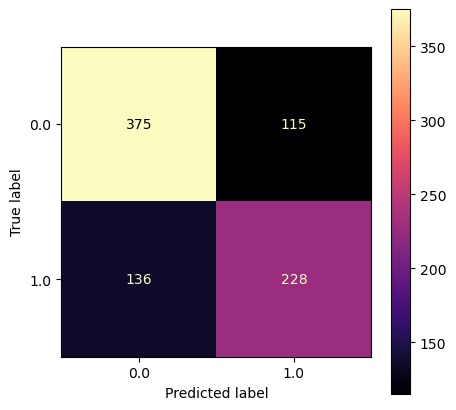

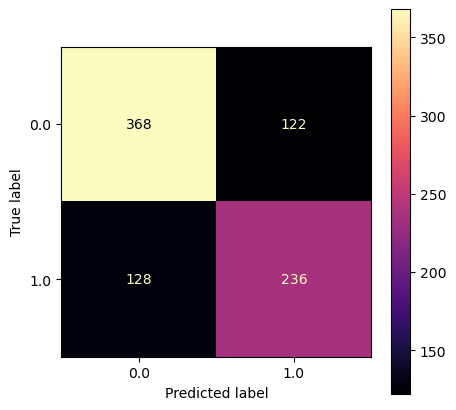

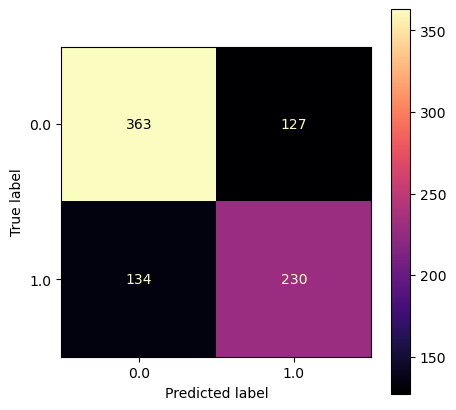

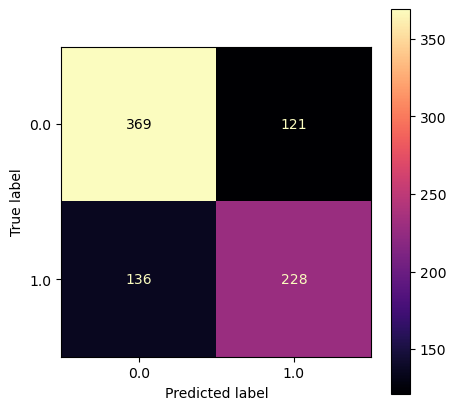

In [90]:
## gbc

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define BC_models and parameters
    
    gbc_model = GradientBoostingClassifier()
    n_estimators = [10, 100, 1000]
    learning_rate = [0.001, 0.01, 0.1]
    subsample = [0.5, 0.7, 1.0]
    max_depth = [3, 7, 9]
            
    # define grid search
    
    grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=gbc_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)

    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    gbc_model =  grid_result.best_estimator_ 
    
    #Train the model
    gbc_model.fit(X,y)

    #Predict test data set
    y_pred = gbc_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=gbc_model.classes_,cmap='magma'))

## LinearDiscriminantAnalysis

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1000,
                           subsample=0.5)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.72      0.77      0.74       490
       EARLY       0.66      0.60      0.63       364

    accuracy                           0.70       854
   macro avg       0.69      0.68      0.69       854
weighted avg       0.69      0.70      0.69       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['TOTAL_ACCULTURAT

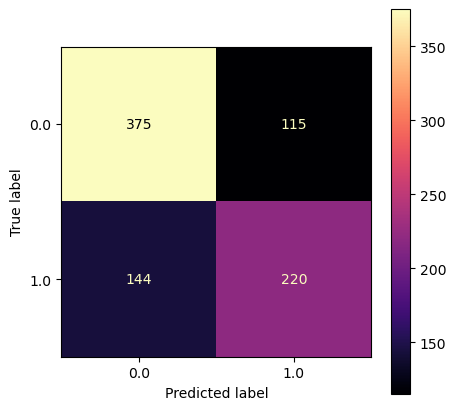

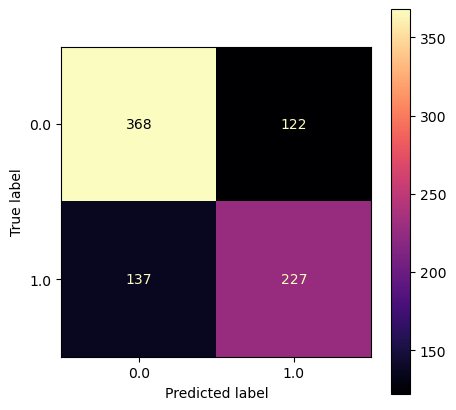

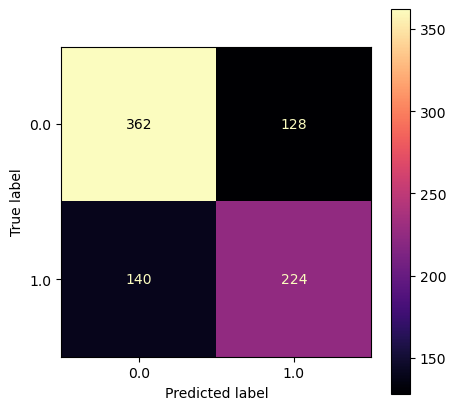

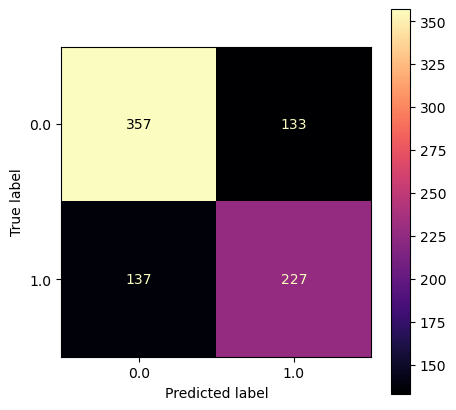

In [91]:
## LDA

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define BC_models and parameters
    
    lda_model = LinearDiscriminantAnalysis()
            
    # define grid search
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid = dict()
    grid['solver'] = ['lsqr','svd','eigen']
    grid_search = GridSearchCV(lda_model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
    grid_results = grid_search.fit(X, y)
    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    lda_model =  grid_result.best_estimator_ 
    
    #Train the model
    lda_model.fit(X,y)

    #Predict test data set
    y_pred = lda_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=lda_model.classes_,cmap='magma'))

## DecisionTreeClassifier

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Fitting 30 folds for each of 300 candidates, totalling 9000 fits
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854
Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Best parameters: GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1000,
                           subsample=0.5)
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.73      0.75      0.74       490
       EARLY       0.65      0.62      0.63       364

    accuracy                           0.70       854
   macro avg       0.69      0.69      0.69       854
weighted avg       0.69      0.70      0.69       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284
Fitting 30 folds for ea

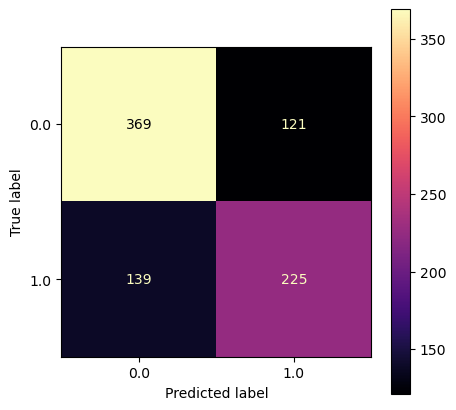

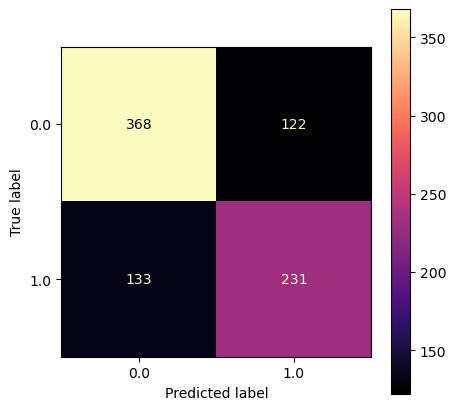

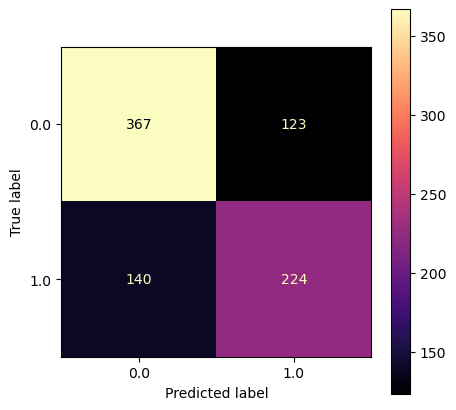

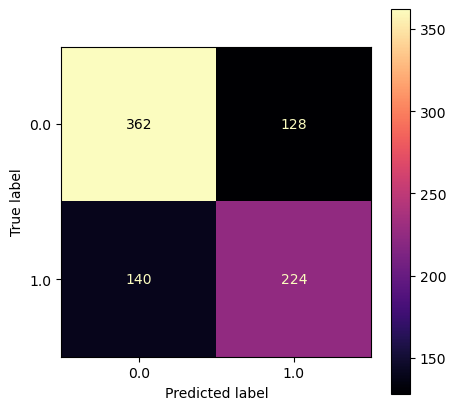

In [92]:
## DTC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define BC_models and parameters
    
    dtc_model = DecisionTreeClassifier()#random_state=42
            
    # define grid search
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    params = {
    'random_state': [5,10,20,25,30,42],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }

    grid_search = GridSearchCV(estimator=dtc_model, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")
    grid_results = grid_search.fit(X, y)
    
    # Use the best parameters from gridSearchCV
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    dtc_model =  grid_result.best_estimator_ 
    
    #Train the model
    dtc_model.fit(X,y)

    #Predict test data set
    y_pred = dtc_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Best parameters:',grid_result.best_estimator_)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,labels=dtc_model.classes_,cmap='magma'))

## AutoML

In [ ]:
!pip install xlrd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pandas as pd
df  = pd.read_excel("../data/EARLY.xls")

print('Proportion missing of COVERED_INSURANCE:',2422/len(df),'Proportion missing of COMB:', 13324/len(df),'Proportion missing of EXPCAN:', 13605/len(df))

df.isnull().sum()

# Dropping all columns with more than 15 percent missing data, and dropping the remaining rows with missing data
df2 = df.drop(['EXPCAN','COMB'], axis=1)
df2 = df2.dropna()

df2.isnull().sum()

#Keeping all the columns and dropping the rows with missing data
df3 = df.dropna()

# Only dropping the column with more than 75 percent of missing data, and dropping all the remaining rows with missing data
df4 = df.drop(columns='EXPCAN',axis=1)
df4 = df4.dropna()

df21 = df2.drop(columns=['SEQN'],axis=1)
df31 = df3.drop(columns=['SEQN'],axis=1)
df41 = df4.drop(columns=['SEQN'],axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

# List of dataframes
E = [df21, df31, df41]

for e in E:
    # Ensure 'EARLY' column has no NaNs and is categorical
    if 'EARLY' in e.columns:
        e['EARLY'] = e['EARLY'].fillna('Unknown')  # Replace NaNs with 'Unknown'
        e['EARLY'] = e['EARLY'].astype(str)        # Convert to string for categorical handling

    ix = 1
    fig = plt.figure(figsize=(50, 20))

    # Loop through columns and plot
    for c in e.columns:
        if c != 'EARLY' and ix <= 3:
            ax1 = fig.add_subplot(2, 3, ix)
            sns.countplot(data=e, x=c, hue="EARLY", ax=ax1)
            ix += 1

        # Reset plot after 3 columns
        if ix > 3:
            plt.tight_layout()
            plt.show()  # Show the current figure
            fig = plt.figure(figsize=(50, 20))  # Start a new figure
            ix = 1  # Reset the index for the next figure

    # Show the remaining plots if any
    if ix > 1:
        plt.tight_layout()
        plt.show()

sns.boxplot(data=df21, x="EARLY", y="RIDAGEYR", hue="EARLY")
sns.boxplot(data=df31, x="EARLY", y="RIDAGEYR", hue="EARLY")
sns.boxplot(data=df41, x="EARLY", y="RIDAGEYR", hue="EARLY")

# Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df21))

dff3 = pd.concat([df21.reset_index(),df_minmax[1]],axis=1)
dff3 = dff3.drop(columns=['index','RIDAGEYR'],axis=1)
dff3 = dff3.rename(columns={1: "RIDAGEYR"})


# ExtrExtraTreesClassifier
d = pd.DataFrame()
for i in range(100):
    #print('Simulation_'+str(i))
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt

    X=dff3.drop(['EARLY'],axis=1)
    y=dff3['EARLY']

    model=ExtraTreesClassifier()
    model.fit(X,y)

    features=pd.Series(model.feature_importances_,index=X.columns)
    #print(features.sort_values(ascending=False))
    
    q = pd.DataFrame(features).rename(columns={0: 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]
print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

# plot

# Plot or graphical representation

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

gini = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = gini.sort_values(by=0, ascending=True)

plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y,color=['red'])#,height = 0.9)

plt.show()

# Information Gain

d = pd.DataFrame()
for i in range(100):
    from sklearn.feature_selection import mutual_info_classif

    X=dff3.drop(['EARLY'],axis=1)
    y=dff3['EARLY']
    
    mutual_info=mutual_info_classif(X,y)

    mutual_data=pd.Series(mutual_info,index=X.columns)
    q = pd.DataFrame(mutual_data).rename(columns={0: 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]

print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

# Plot or graphical representation

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

MI = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = MI.sort_values(by=0, ascending=True)

plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y,color=['green'])#,height = 0.9)

plt.show()


## TPOT

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    search_model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
    
    # perform the search
    grid_result = search_model.fit(X, y)
    
    # Use the best parameters from TPOP
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    TPOT_model =  grid_result
    
    #Train the model
    TPOT_model.fit(X,y)

    #Predict test data set
    y_pred = TPOT_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,cmap='magma'))

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7661942337649071

Generation 2 - Current best internal CV score: 0.7670650425189612

Generation 3 - Current best internal CV score: 0.7746622743175261

Generation 4 - Current best internal CV score: 0.7746622743175261

Generation 5 - Current best internal CV score: 0.7767052274062157

Best pipeline: GradientBoostingClassifier(GaussianNB(input_matrix), learning_rate=0.5, max_depth=7, max_features=0.55, min_samples_leaf=15, min_samples_split=15, n_estimators=100, subsample=0.9500000000000001)
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7661942337649071

Generation 2 - Current best internal CV score: 0.7670650425189612

Generation 3 - Current best internal CV score: 0.7746622743175261

Generation 4 - Current best internal CV score: 0.7746622743175261

Generation 5 - Current best internal CV score: 0.7767052274062157

Best pipeline: GradientBoostingClassifier(GaussianNB(input_matrix), learning_rate=0.5, max_depth=7, max_features=0.55, min_samples_leaf=15, min_samples_split=15, n_estimators=100, subsample=0.9500000000000001)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Index(['RIAGENDR', 'RACE', 'EARLY', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'RIDAGEYR'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.71      0.72      0.72       490
       EARLY       0.62      0.60      0.61       364

    accuracy                           0.67       854
   macro avg       0.66      0.66      0.66       854
weighted avg       0.67      0.67      0.67       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 2284


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7447700400929543

Generation 2 - Current best internal CV score: 0.7447700400929543

Generation 3 - Current best internal CV score: 0.7447700400929543

Generation 4 - Current best internal CV score: 0.7449002783523582

Generation 5 - Current best internal CV score: 0.7476831635128577

Best pipeline: KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=89, p=1, weights=distance)
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7447700400929543

Generation 2 - Current best internal CV score: 0.7447700400929543

Generation 3 - Current best internal CV score: 0.7447700400929543

Generation 4 - Current best internal CV score: 0.7449002783523582

Generation 5 - Current best internal CV score: 0.7476831635128577

Best pipeline: KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=89, p=1, weights=distance)
Index(['TOTAL_ACCULTURATION_SCORE_v2', 'RIDAGEYR', 'SMOKER', 'RACE', 'EDUC',
       'COUPLE', 'HTN', 'EARLY'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.74      0.76      0.75       490
       EARLY       0.66      0.65      0.66       364

    accuracy                           0.71       854
   macro avg       0.70      0.70      0.70       854
weighted avg       0.71      0.71      0.71       854

Training set statistics
For EARLY=0.0, n= 2284
For EARLY=1.0, n= 

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7723301156822188

Generation 2 - Current best internal CV score: 0.7726231517658776

Generation 3 - Current best internal CV score: 0.7771431854746036

Generation 4 - Current best internal CV score: 0.7771431854746036

Generation 5 - Current best internal CV score: 0.7775805051201513

Best pipeline: KNeighborsClassifier(ZeroCount(RobustScaler(input_matrix)), n_neighbors=84, p=2, weights=distance)
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7723301156822188

Generation 2 - Current best internal CV score: 0.7726231517658776

Generation 3 - Current best internal CV score: 0.7771431854746036

Generation 4 - Current best internal CV score: 0.7771431854746036

Generation 5 - Current best internal CV score: 0.7775805051201513

Best pipeline: KNeighborsClassifier(ZeroCount(RobustScaler(input_matrix)), n_neighbors=84, p=2, weights=distance)
Index(['RIDAGEYR', 'TOTAL_ACCULTURATION_SCORE_v2', 'RACE', 'EDUC', 'FAT',
       'COUPLE', 'RIAGENDR', 'EARLY'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.73      0.73      0.73       490
       EARLY       0.64      0.64      0.64       364

    accuracy                           0.69       854
   macro avg       0.69      0.69      0.69       854
weighted avg       0.69      0.69      0.69       854

Training set statistics
For EARLY=0.0, n= 2284
For E

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7568662376465182

Generation 2 - Current best internal CV score: 0.7568662376465182

Generation 3 - Current best internal CV score: 0.7568662376465182

Generation 4 - Current best internal CV score: 0.7632855793048852

Generation 5 - Current best internal CV score: 0.7632855793048852

Best pipeline: KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=34, p=1, weights=distance)
Test set statistics
For EARLY=0.0, n= 854
For EARLY=1.0, n= 854


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7568662376465182

Generation 2 - Current best internal CV score: 0.7568662376465182

Generation 3 - Current best internal CV score: 0.7568662376465182

Generation 4 - Current best internal CV score: 0.7632855793048852

Generation 5 - Current best internal CV score: 0.7632855793048852

Best pipeline: KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=34, p=1, weights=distance)
Index(['RIDAGEYR', 'TOTAL_ACCULTURATION_SCORE_v2', 'COUPLE', 'RACE', 'SMOKER',
       'FAT', 'EDUC', 'EARLY'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

   Non_EARLY       0.74      0.74      0.74       490
       EARLY       0.65      0.65      0.65       364

    accuracy                           0.70       854
   macro avg       0.70      0.70      0.70       854
weighted avg       0.70      0.70      0.70       854



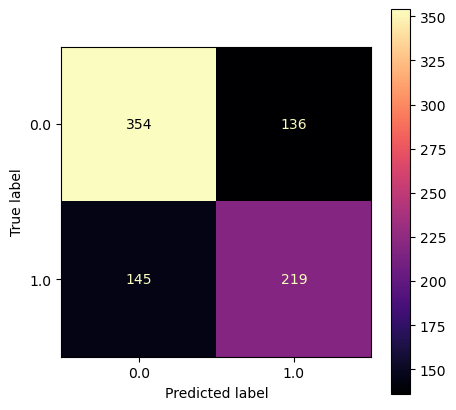

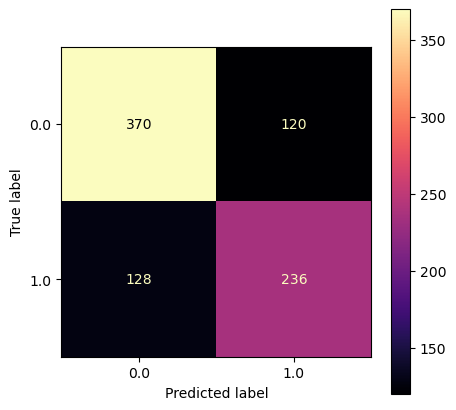

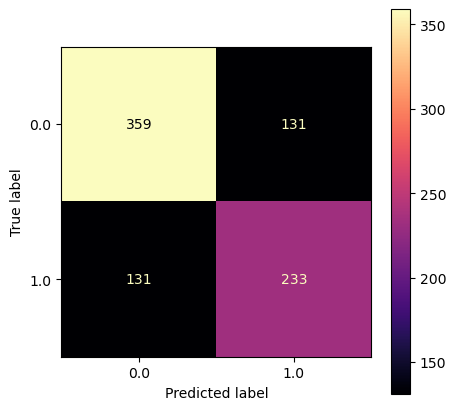

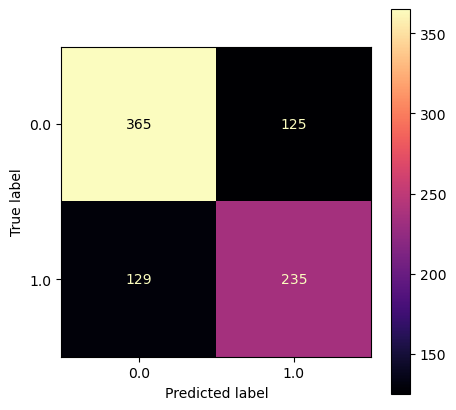

In [39]:
## TPOT

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))
    
    # define search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    search_model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
    
    # perform the search
    grid_result = search_model.fit(X, y)
    
    # Use the best parameters from TPOP
    
    print('Test set statistics')
    for i in testy.unique():
        print('For EARLY='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    TPOT_model =  grid_result
    
    #Train the model
    TPOT_model.fit(X,y)

    #Predict test data set
    y_pred = TPOT_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['Non_EARLY','EARLY']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,cmap='magma'))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler#Checking performance our model with classification report.
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

cols  = dff3.columns
cols1 = d1.T.columns[:7]
cols1 = cols1.append(pd.Index(['EARLY']))
cols2 = gini.T.columns[:7].append(pd.Index(['EARLY']))
cols3 = MI.T.columns[:7].append(pd.Index(['EARLY']))

colss = [cols,cols1,cols2,cols3]
import numpy as np
for col in colss:
    X = dff3[col].drop(['EARLY'],axis=1)
    y = dff3['EARLY']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    over = SMOTE(sampling_strategy=0.9)
    under = RandomUnderSampler(sampling_strategy=0.9)

    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
        
    # transform the dataset
    X, y = pipeline.fit_resample(trainX, trainy)

    for i in y.unique():
        print('For EARLY='+str(i)+', n=',len(y==i))

    testX = test.drop(['EARLY'],axis=1)
    testy = test['EARLY']
    
    from sklearn.model_selection import RepeatedStratifiedKFold
    from tpot import TPOTClassifier
    
    # define model evaluation
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
   
    # define search
    
    model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
    
    # perform the search
    
    model.fit(X, y)
    
    # export the best model
    #model.export('tpot_best_modelbestonset.py')
    
    y_pred = model.predict(testX)
    print(col)
    print(classification_report(testy,y_pred))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,cmap='magma'))

In [ ]:
dff3.head()

In [ ]:
## Webapp

In [ ]:
from flask import Flask, jsonify, request, render_template
import joblib
import numpy as np

app = Flask(__name__)

# Load pre-trained model
model = joblib.load("../model/Race_pred_model1.joblib")

# Endpoint for prediction
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array([
        dff3['RIDAGEYR'], dff3['RACE'], dff3['SMOKER'],
        df3['EDUC'], df3['COUPLE'], df3['FAT'],
        df3['HTN'], df3['TOTAL_ACCULTURATION_SCORE_v2']
    ]).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction[0]})

# Render HTML Template
@app.route('/')
def home():
    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)